# Travel Package Purchase Prediction - Project 5

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

### Objective

1.   To predict which customers are more likely to purchase new travel package or not.
2.   Identify customer and market characteristics which will help improve the company’s marketing effectiveness and drive spending efficiency.




#### Data Dictionary

*Customer details:*

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import Libraries

In [1]:
!pip install xgboost 
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [2]:
# import the data into a pandas dataframe
data = pd.read_excel("Tourism.xlsx",sheet_name='Tourism')
# make a copy fo the data
df = data.copy()


### Observe dataset

In [3]:
df.shape

(4888, 20)

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


- Column Titles are in a useable format
- There is no summary row
- a number of categorical values will need to be transformed prior to model buildling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- There are 6 columns with object data
- 4888 is the maximum number of values
- Several columns are missing values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0




* CustomerID will be dropped 
* ProdTaken is the dependent variable
* Age appears normally distributed and is missing some values
* CityTier has a min of 1 and max of 3
* DurationOfPitch is missing values and has median of 13 and max of 127 indicating outliers
* NumberOfPersonVisiting ranges from 1 to 6
* NumberOfFollowups is missing values and ranges from 1 to 6
* PreferredPropertyStar is missing ales and ranges from 3 to 5
* NumberOfTrips is missing values with a median of 3 and max of 22 indicating outliers
* Passport is binary
* PitchSatisfactionScore has a range of 1 to 5
* OwnCar is binary
* NumberOfChildrenVisiting is missing values with a range of 1 to 3
* MonthlyIncome is missing values with a mean of 23620, median of 22347 and min of 1000 and max of 98678 indicating outliers at both ends





In [8]:
# check for nulls

df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore        0
CityTier                      0
OwnCar                        0
ProdTaken                     0
CustomerID                    0
dtype: int64

- I wil fill nulls with median values
- MonthlyIncome medians will be grouped by Designation to increase relevancy

### Fill in missing values with median

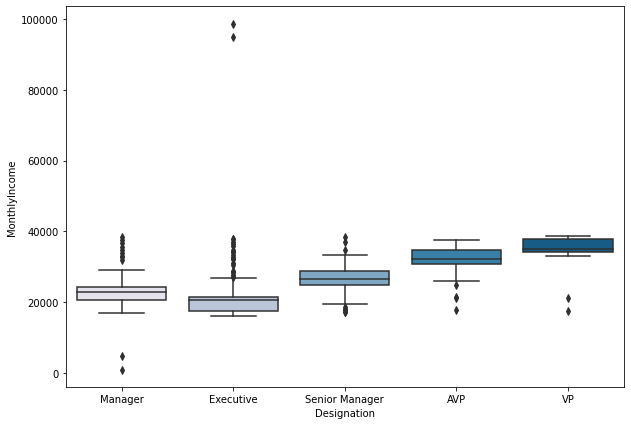

In [9]:
# quick check of MonthlyIncome by Designation

plt.figure(figsize=(10,7))
sns.boxplot(df['Designation'],df["MonthlyIncome"],palette="PuBu")
plt.show()

- MonthlyIncome does seem to vary by Designation we will use it to replace missing values in MonthlyIncome column

In [10]:
#Replace missing MonthlyIncome values with median grouped by Designation for increased relevance

df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('Designation')['MonthlyIncome'].transform('median')) 

In [11]:
# This function will replace any remaining missing values in every column with its median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [12]:
# fill remaining missing values in TypeofContact with Unknown

df['TypeofContact'].fillna('Unknown', inplace = True)
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [13]:
# Check Gender for mispellings

df.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [14]:
# replace Fe Male wit Female in Gender
df['Gender'] = df['Gender'].replace(['Fe Male'], 'Female')

In [15]:
df.Gender.value_counts()


Male      2916
Female    1972
Name: Gender, dtype: int64

In [16]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  3
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         2
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [18]:
# After running, XGBoost Tuned model, City Tier was a prominent feature. I have gone back and added this code to improve analysis
# Convert CityTier into object, this will allow onehotencoding and help better isolate which cities contribute most information to model

df['CityTier'] = df['CityTier'].astype('category')

### Convert objects variables to categorical and analyze

In [19]:
# identify object columns
cols = df.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [20]:
# convert objects to categories
for i in cols.columns:
    df[i] = df[i].astype('category')

In [21]:
# check unique values of categorical variables and observe any anomolies

cols_cat= df.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Unknown              25
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male      2916
Female    1972
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        91

**Observations of categorical variables**

- CityTier 1 has the most customers with more than double City Tier 2
- TypeofContact has 25 Unknown values. This should not affect the model
- Occupation has just 2 values as Free Lancer
- Basic and Deluxe are the most common product pitched
- Married is most common MaritalStatus by a wide margin
- Designation has many Executives. We cannot be sure what level Executive is but assume it is higher status. OneHotEncoding will allow model to use this variable without needing to clearly define



In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

* all missing values have been accounted for
* all obejct variables have been converted into categories

In [23]:
# Quick review of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.547259,9.104795,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.00,13.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0


In [24]:
# take a look at the categorical values in the dataset

df.describe(include='category').T

,count,unique,top,freq
TypeofContact,4888,3,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [25]:
# drop CustomerID as it will not help with analysis

df.drop(['CustomerID'], axis=1, inplace=True)

## EDA

### Univariate Analysis

In [26]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

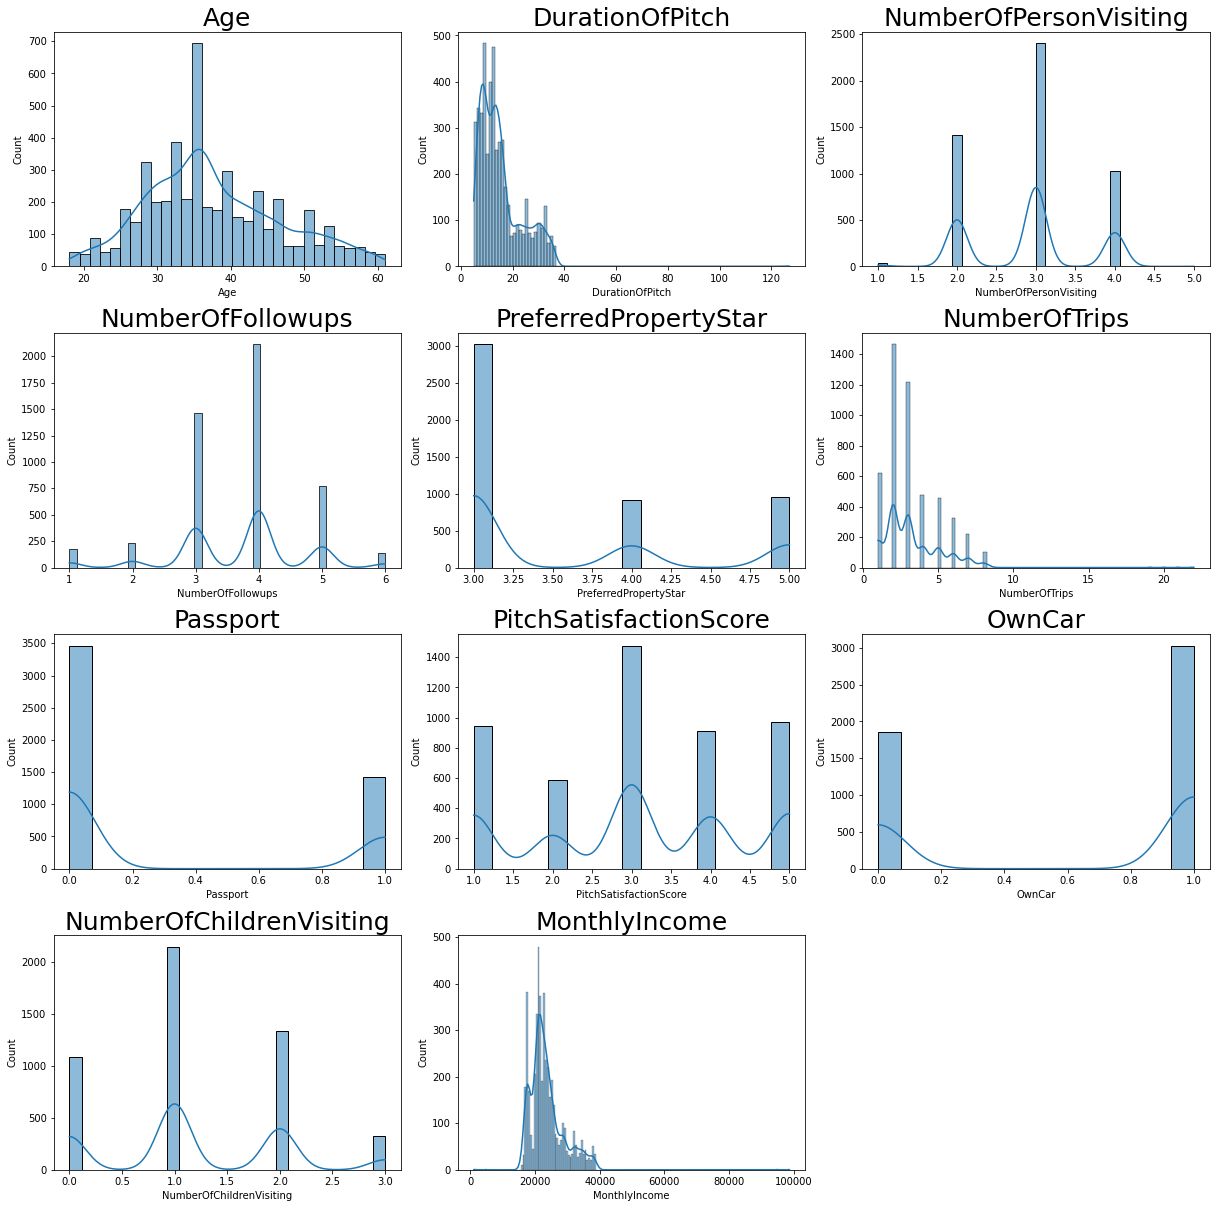

In [27]:
# lets plot histogram of all numerical variables to check for normality vs. skewness

all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove("ProdTaken")
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    #plt.hist(data[all_col[i]])
    sns.histplot(df[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

* Many of the variables are discrete
* We will take a closer look at Age, DurationOfPitch, NumberOfTrips, and MonthlyIncome to look for outliers

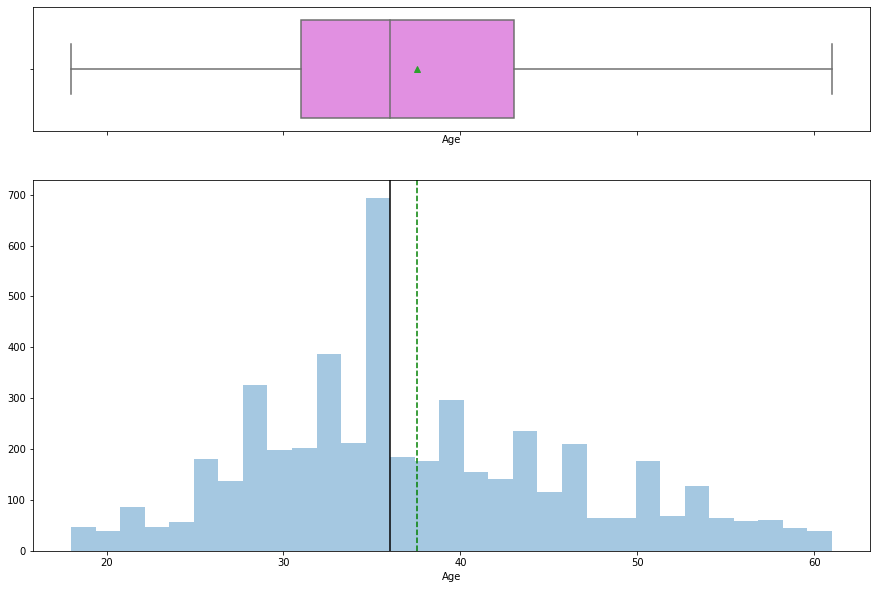

In [28]:
histogram_boxplot(df.Age)

Age is fairly well distributed with a mean of 37.6 and median of 36

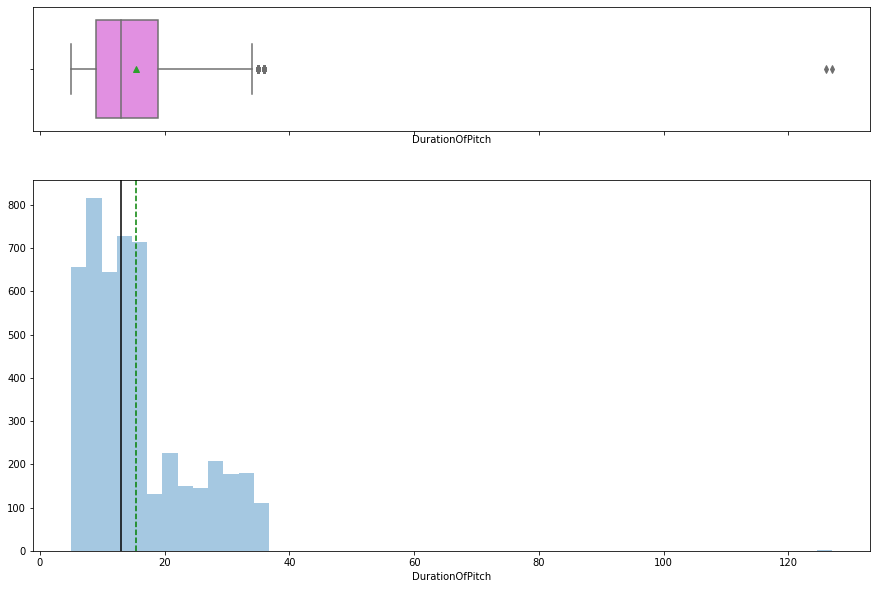

In [29]:
histogram_boxplot(df.DurationOfPitch)

DurationOfPitch is right skewed with several major outliers which may need to be trimmed

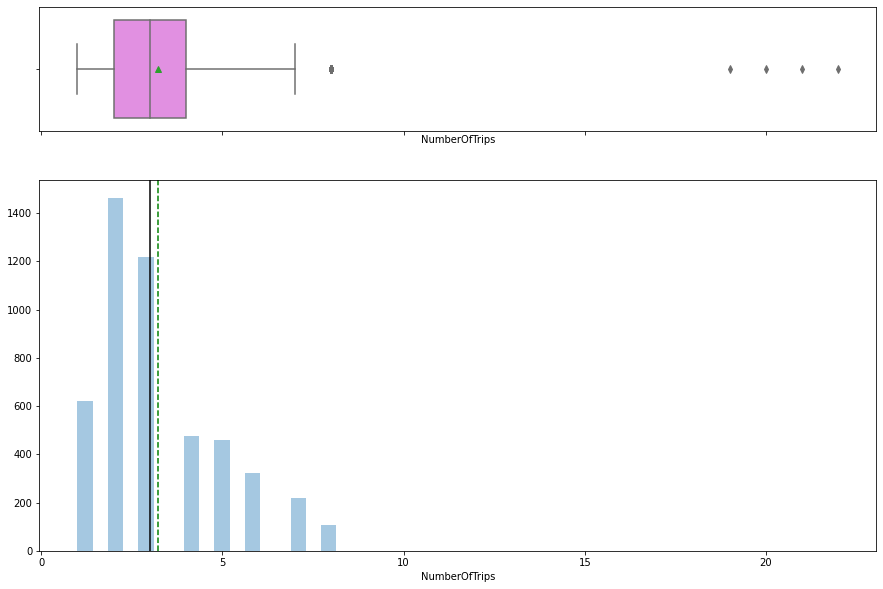

In [30]:
histogram_boxplot(df.NumberOfTrips)

NumberOfTrips is right skewed with several major outliers which may need to be trimmed

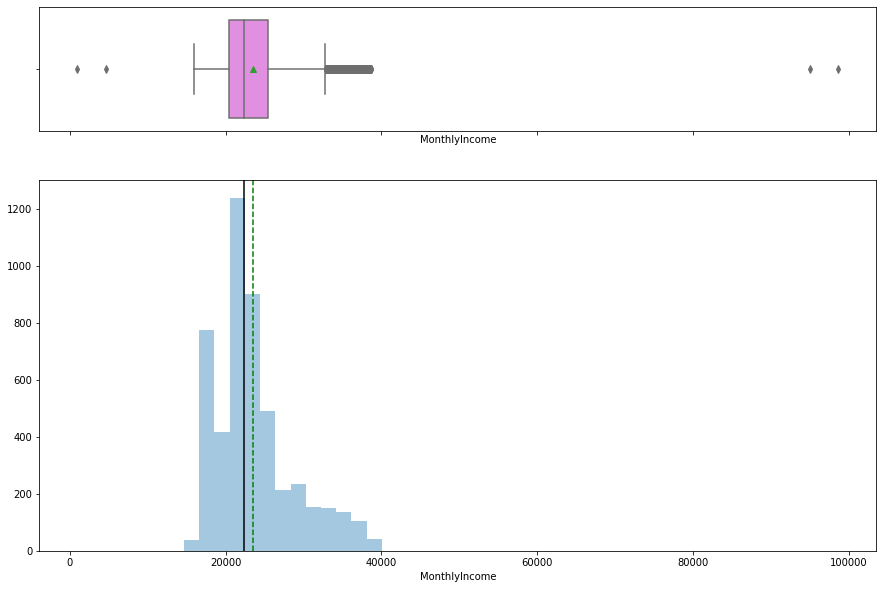

In [31]:
histogram_boxplot(df.MonthlyIncome)

MonthlyIncome is right skewed with several outliers at the top and bottome which may need to be trimmed

In [32]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

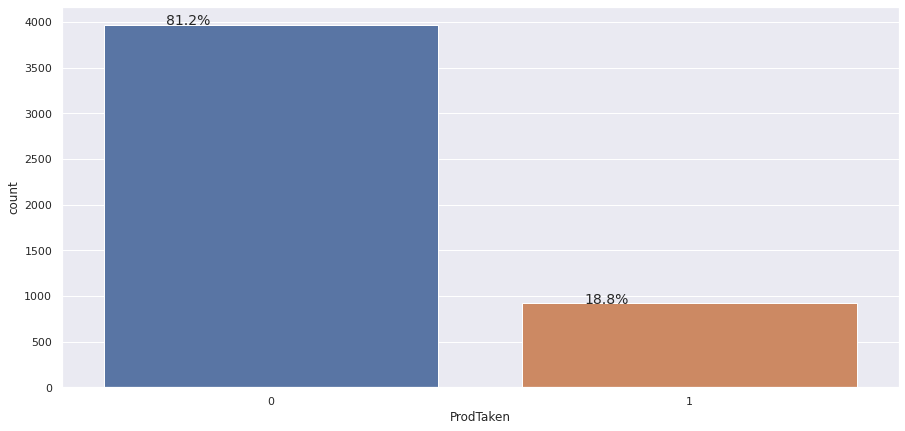

In [33]:
perc_on_bar(df['ProdTaken'])

81.2*% of customers did not purchase a travel package

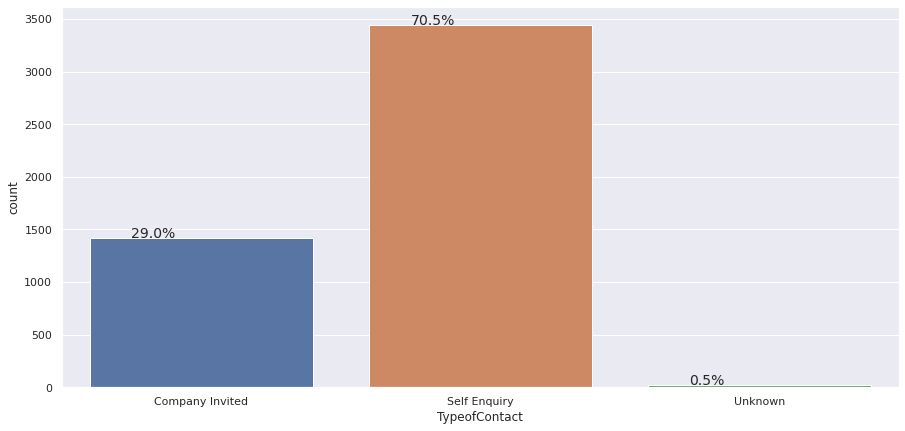

In [34]:
perc_on_bar(df['TypeofContact'])

70.5% of customers came to the company via Self Enquiry

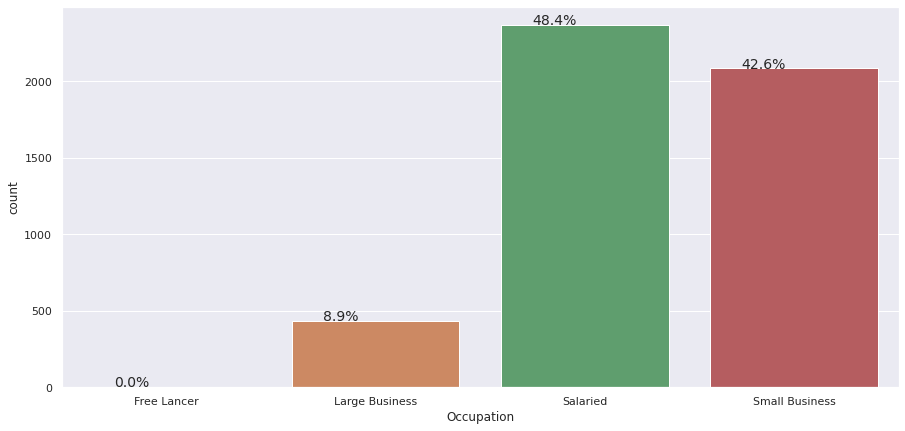

In [35]:
perc_on_bar(df['Occupation'])

The majority of customers identify as Salaried Employees or Small Business

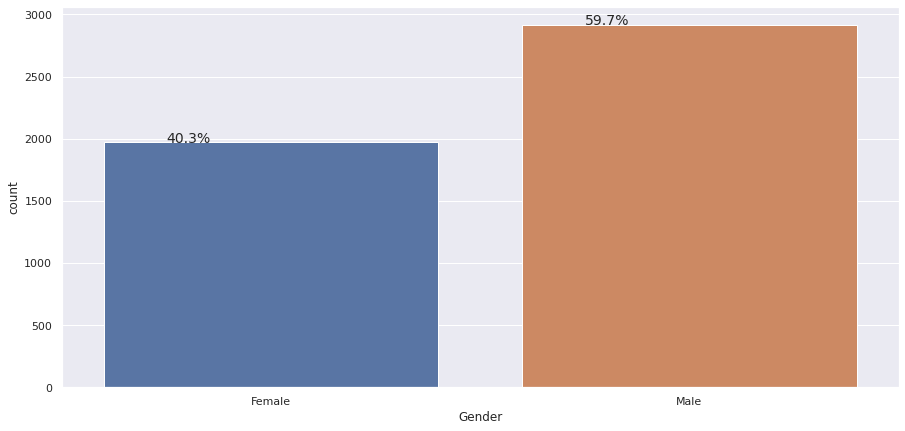

In [36]:
perc_on_bar(df['Gender'])

50.7% of customers are Male

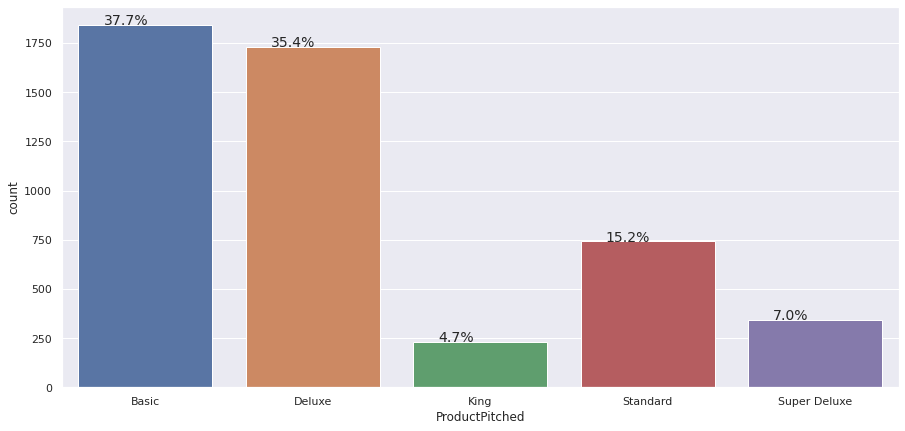

In [37]:
perc_on_bar(df['ProductPitched'])

The most commong packages pitched to customers were either basic or deluxe

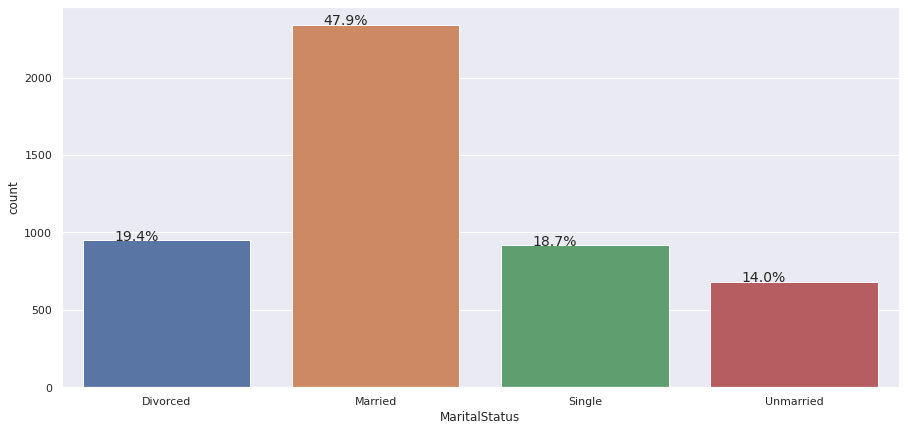

In [38]:
perc_on_bar(df['MaritalStatus'])

Almost half 47.9% of customers are Married

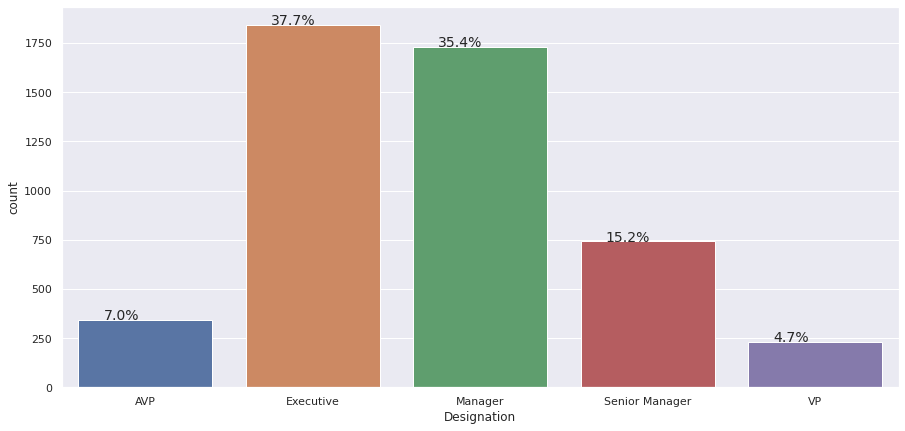

In [39]:
perc_on_bar(df['Designation'])

Customers tend to be either Executives (37.7%) or Managers (35.4%)

### Bivariate Analysis

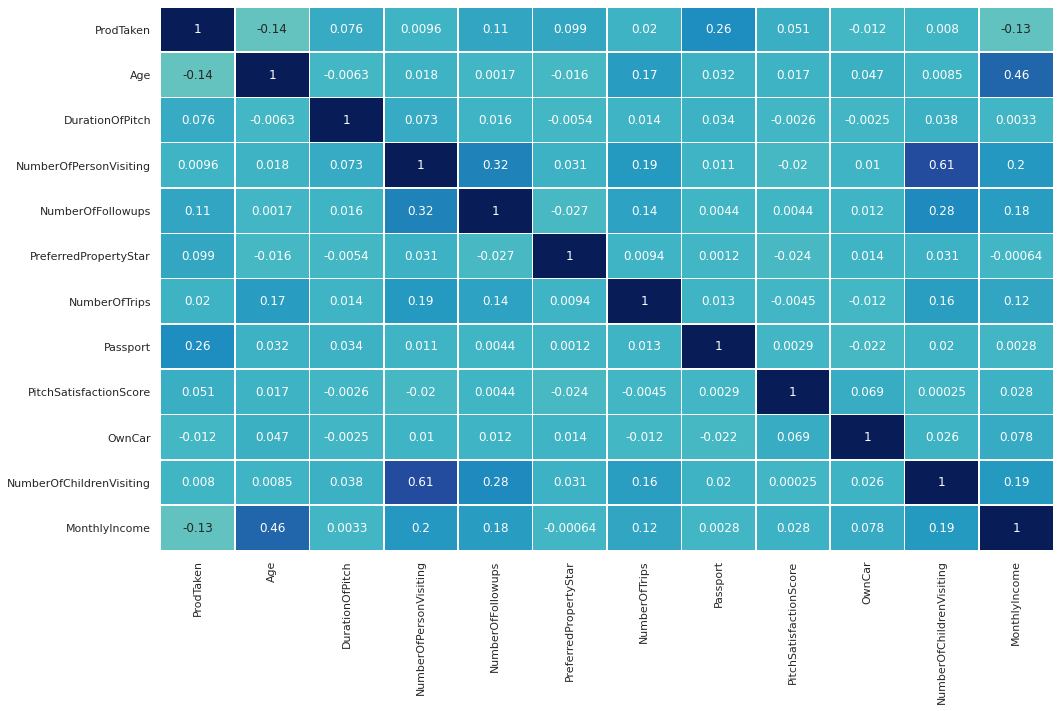

In [40]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

- There does not seem to much strong correlation in the dataset which is surprising
- Age has a loose correlation with MonthlyIncome
- NumberOfPersonVisiting has a positve association with NumberofChildrenVisiting which makes sense. We may look to drop one of these columns

In [41]:
df.corr()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.143753,0.076481,0.009627,0.111560,0.098704,0.019709,0.260844,0.051394,-0.011508,0.008009,-0.128366
Age,-0.143753,1.000000,-0.006261,0.017856,0.001682,-0.015932,0.174694,0.032398,0.017392,0.047356,0.008486,0.460678
DurationOfPitch,0.076481,-0.006261,1.000000,0.073163,0.015515,-0.005442,0.014153,0.033526,-0.002552,-0.002504,0.038115,0.003291
NumberOfPersonVisiting,0.009627,0.017856,0.073163,1.000000,0.324895,0.030519,0.190113,0.011177,-0.019581,0.010362,0.606321,0.199716
NumberOfFollowups,0.111560,0.001682,0.015515,0.324895,1.000000,-0.026989,0.135103,0.004411,0.004405,0.012186,0.281583,0.175672
PreferredPropertyStar,0.098704,-0.015932,-0.005442,0.030519,-0.026989,1.000000,0.009432,0.001221,-0.024019,0.013577,0.031362,-0.000640
NumberOfTrips,0.019709,0.174694,0.014153,0.190113,0.135103,0.009432,1.000000,0.012926,-0.004501,-0.012164,0.161022,0.115726
Passport,0.260844,0.032398,0.033526,0.011177,0.004411,0.001221,0.012926,1.000000,0.002926,-0.022330,0.020244,0.002813
PitchSatisfactionScore,0.051394,0.017392,-0.002552,-0.019581,0.004405,-0.024019,-0.004501,0.002926,1.000000,0.068850,0.000251,0.028045
OwnCar,-0.011508,0.047356,-0.002504,0.010362,0.012186,0.013577,-0.012164,-0.022330,0.068850,1.000000,0.025659,0.077852


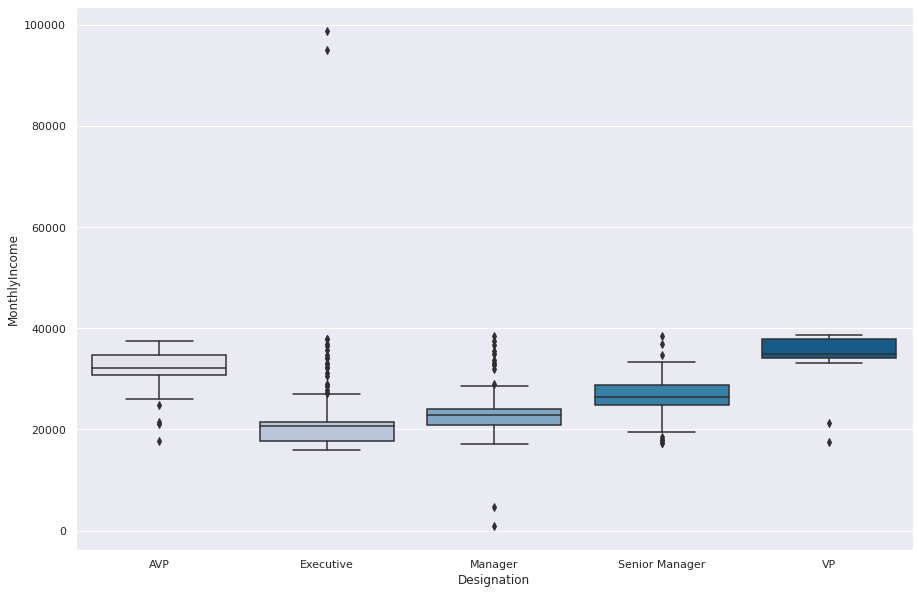

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Designation"],df["MonthlyIncome"],palette="PuBu")
plt.show()

VP and AVP make the highest median iuncomes however, Executives have several outliers with outsized incomes

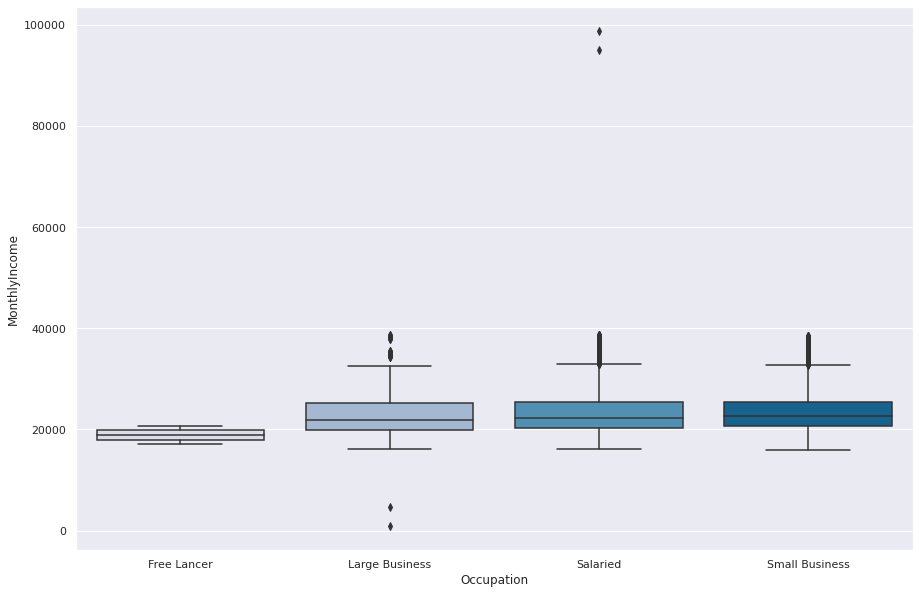

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Occupation"],df["MonthlyIncome"],palette="PuBu")
plt.show()

Incomes across occupation type are fairly evenly distributed

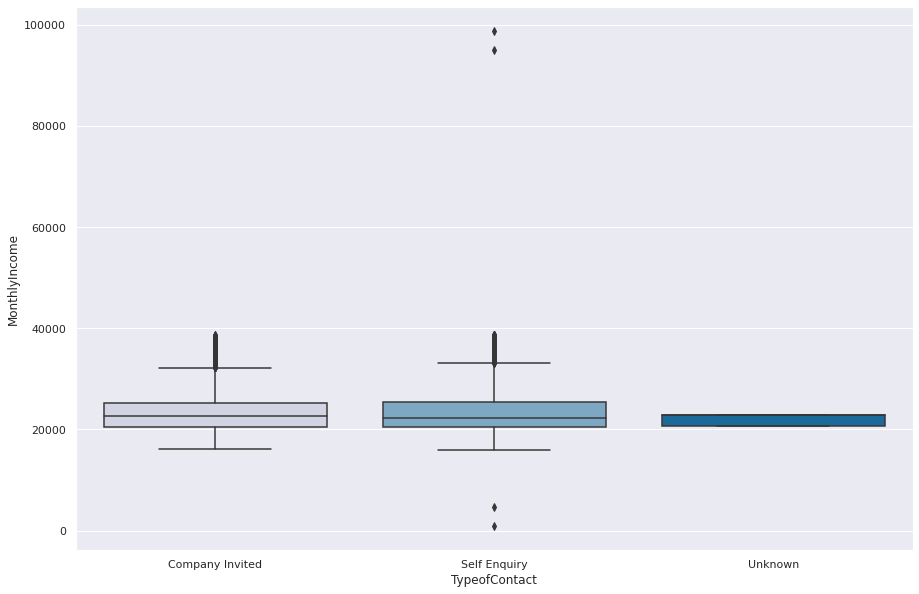

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(df["TypeofContact"],df["MonthlyIncome"],palette="PuBu")
plt.show()

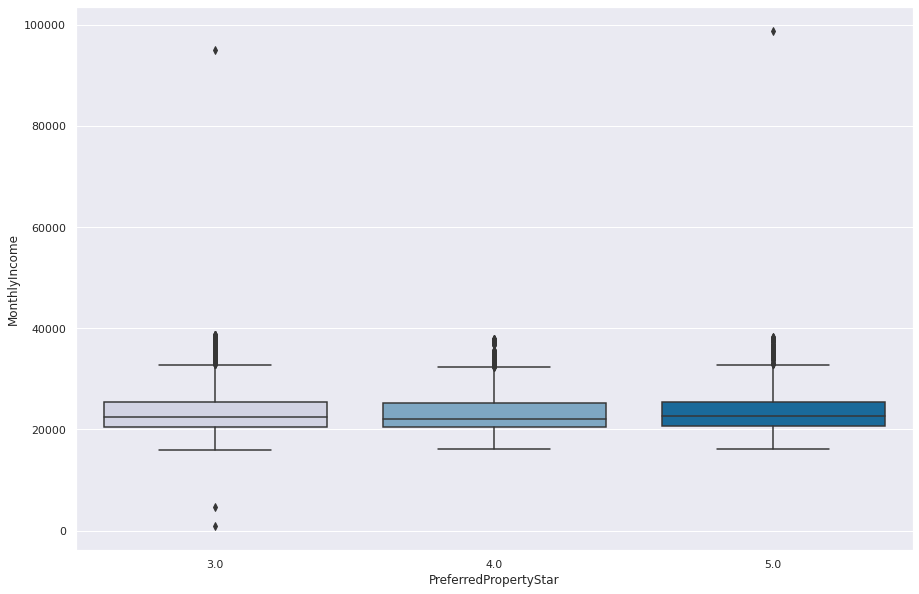

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(df["PreferredPropertyStar"],df["MonthlyIncome"],palette="PuBu")
plt.show()

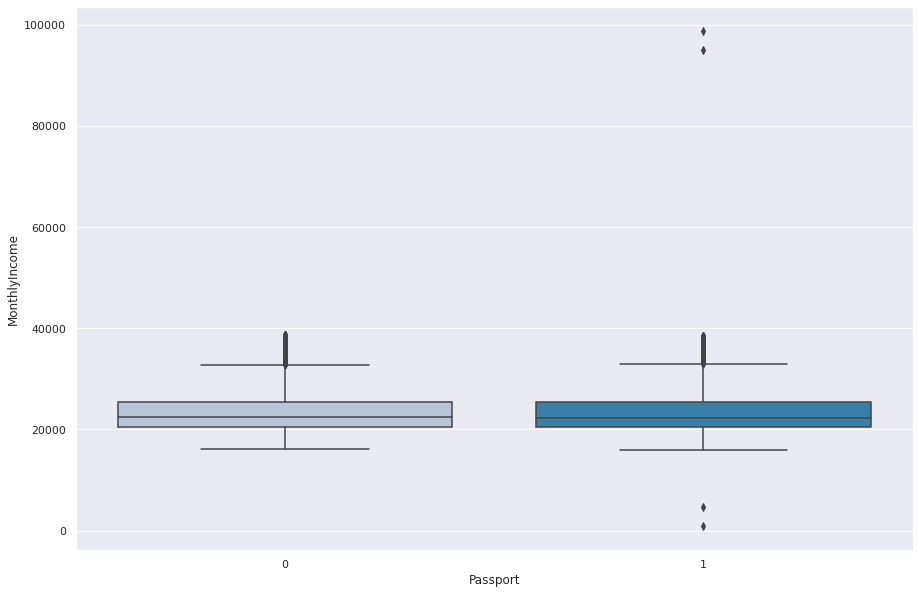

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Passport"],df["MonthlyIncome"],palette="PuBu")
plt.show()

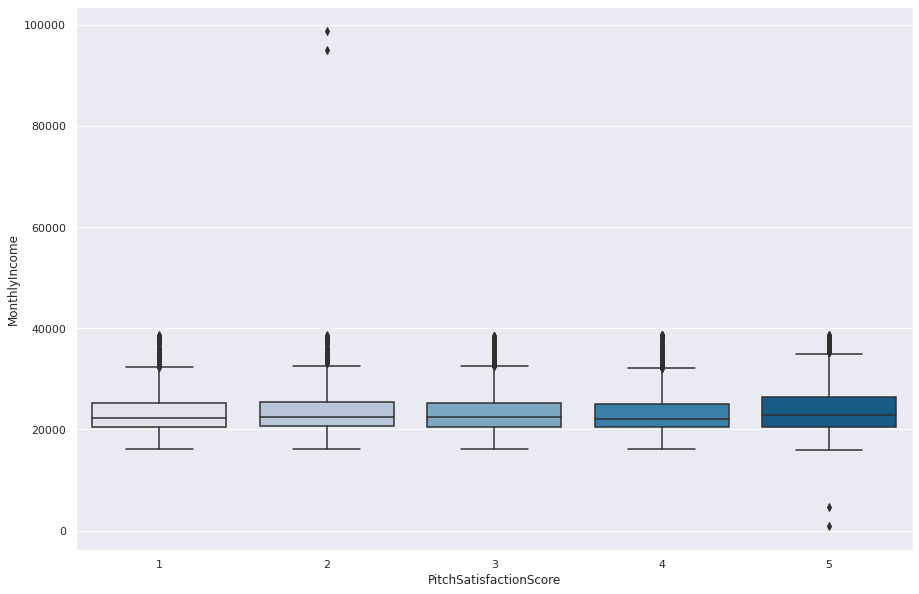

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(df["PitchSatisfactionScore"],df["MonthlyIncome"],palette="PuBu")
plt.show()

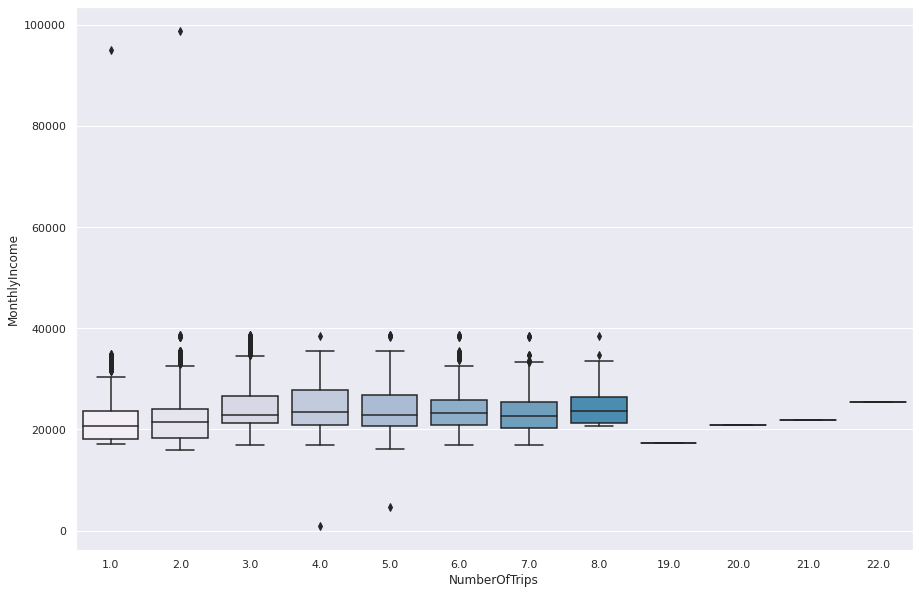

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(df["NumberOfTrips"],df["MonthlyIncome"],palette="PuBu")
plt.show()

Income has a very slight impact on number of trips taken

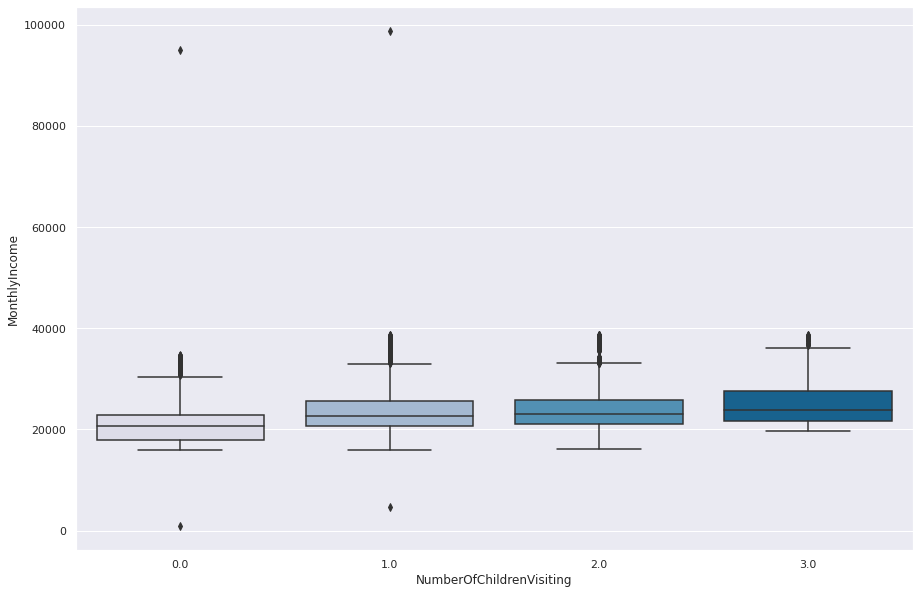

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(df["NumberOfChildrenVisiting"],df["MonthlyIncome"],palette="PuBu")
plt.show()

As expected, higher incomes tend to have more visitors

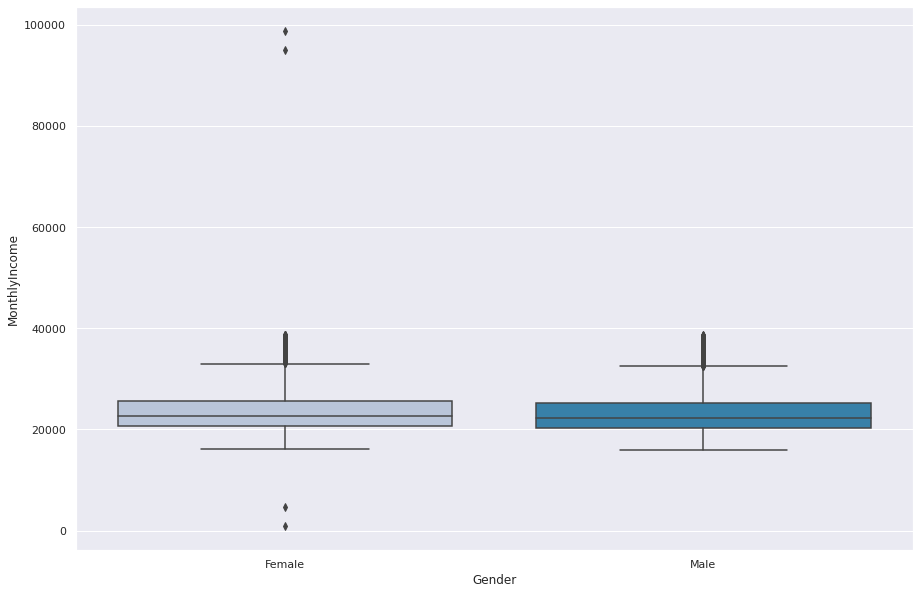

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Gender"],df["MonthlyIncome"],palette="PuBu")
plt.show()

Gender did not seem to impact the median income hwoever, Females have greater variability with several outliers at the upper and lower bounds

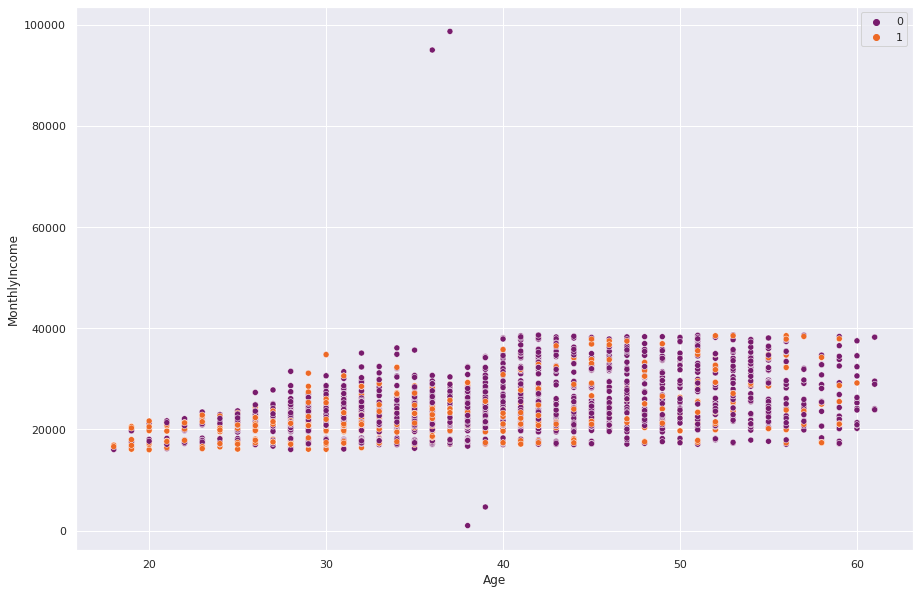

In [51]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Age"],df["MonthlyIncome"],hue=df["ProdTaken"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

There does not seem to be a strong relationship between customers that buy packages and age. There is a small indication that younger customers buy more packages

In [52]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(20,10))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken     0    1   All
Age                       
18.0          6    8    14
19.0         11   21    32
20.0         13   25    38
21.0         18   23    41
22.0         31   15    46
23.0         33   13    46
24.0         38   18    56
25.0         54   20    74
26.0         69   37   106
27.0        108   30   138
28.0        121   26   147
29.0        121   57   178
30.0        151   48   199
31.0        162   41   203
32.0        157   40   197
33.0        149   40   189
34.0        167   44   211
35.0        203   34   237
36.0        386   71   457
37.0        161   24   185
38.0        161   15   176
39.0        136   14   150
40.0        123   23   146
41.0        131   24   155
42.0        122   20   142
43.0        120   10   130
44.0         88   17   105
45.0         98   18   116
46.0        110   11   121
47.0         76   12    88
48.0         54   11    65
49.0         56    9    65
50.0         74   12    86
51.0         73   17    90
52.0         54   14    68
5

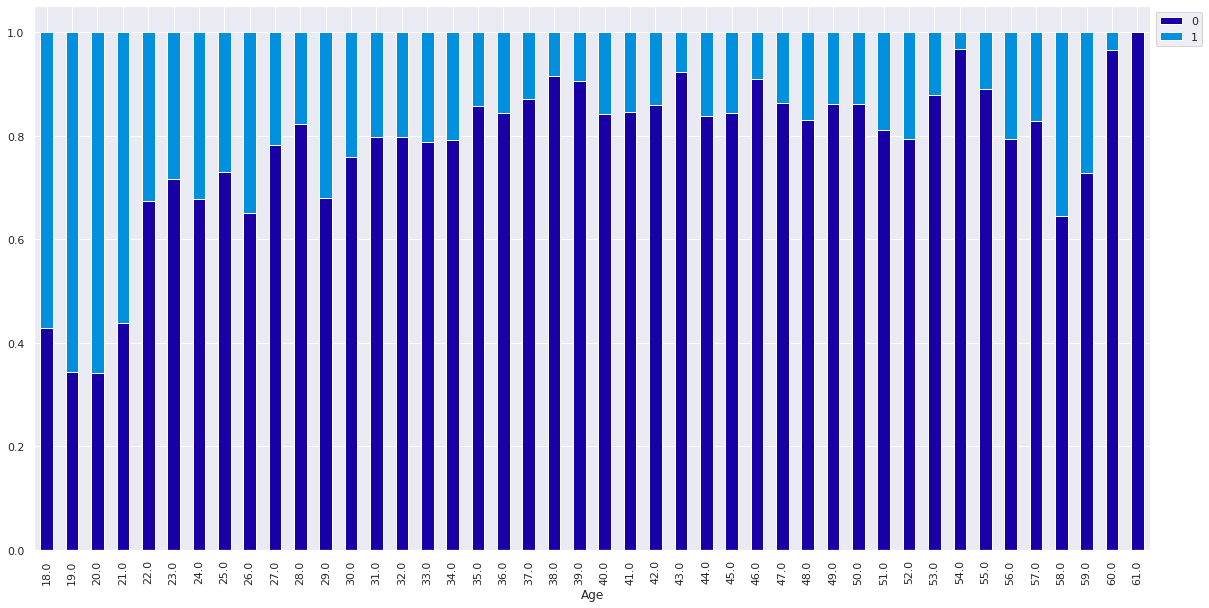

In [53]:
stacked_plot(df['Age'])

Younger customers are more likely to buy packages

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


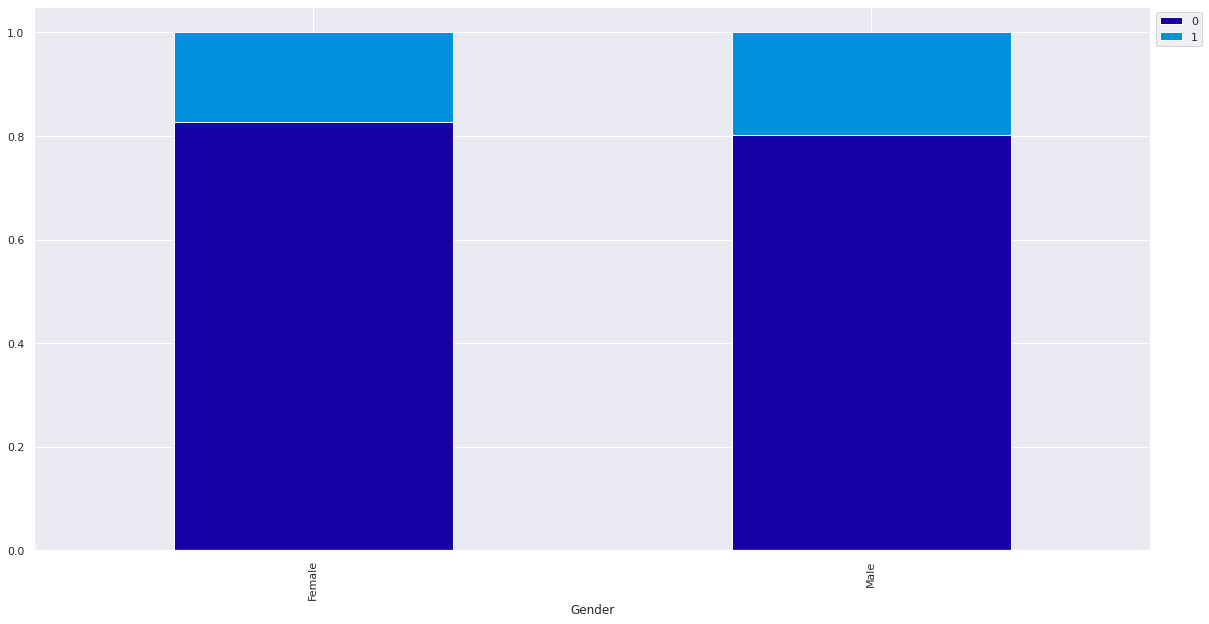

In [54]:
stacked_plot(df['Gender'])

17% of females purchase packages
29% of males purchase packages

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


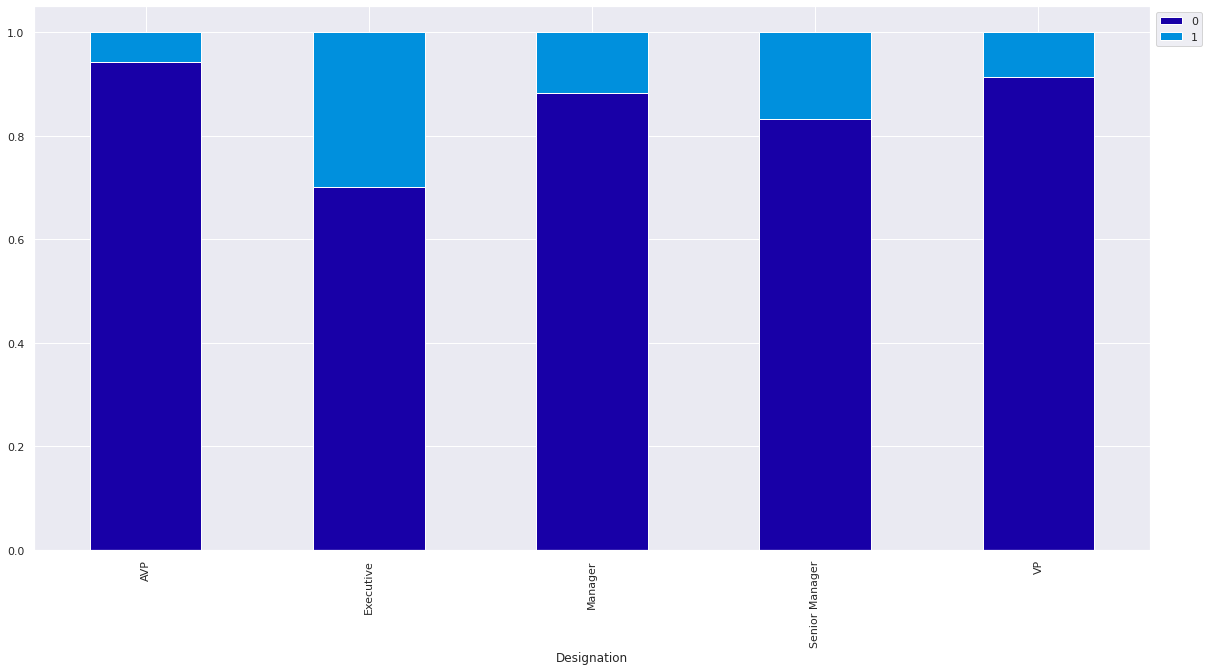

In [55]:
stacked_plot(df['Designation'])

Executives are more likely to purchase packages

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


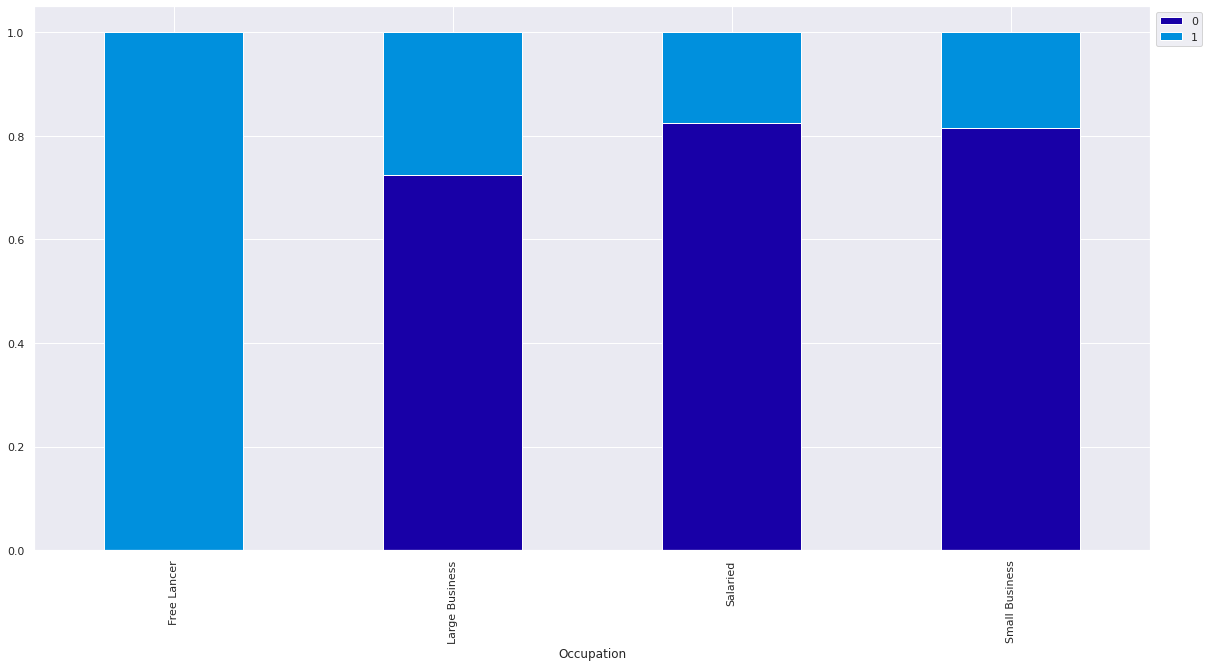

In [56]:
stacked_plot(df['Occupation'])

Freelancer like to purhcase packages but sample size is small
Employess of large business are more likely to purchase packages than Salaried or Small Business

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


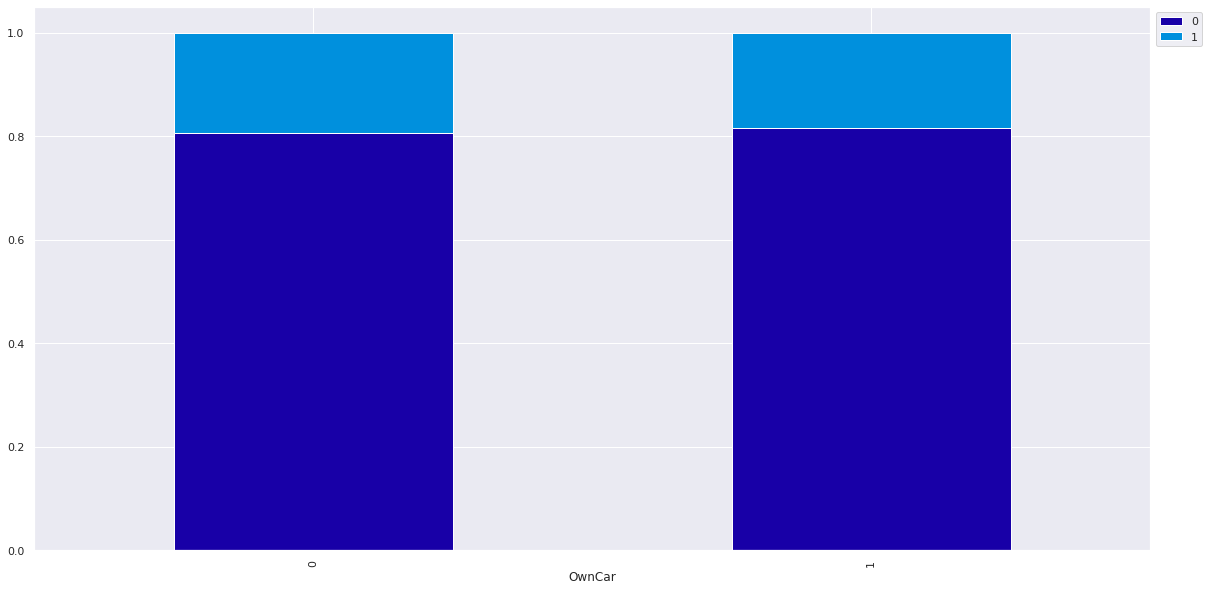

In [57]:
stacked_plot(df['OwnCar'])

Car ownership is not a good indicatior of package purchasers

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


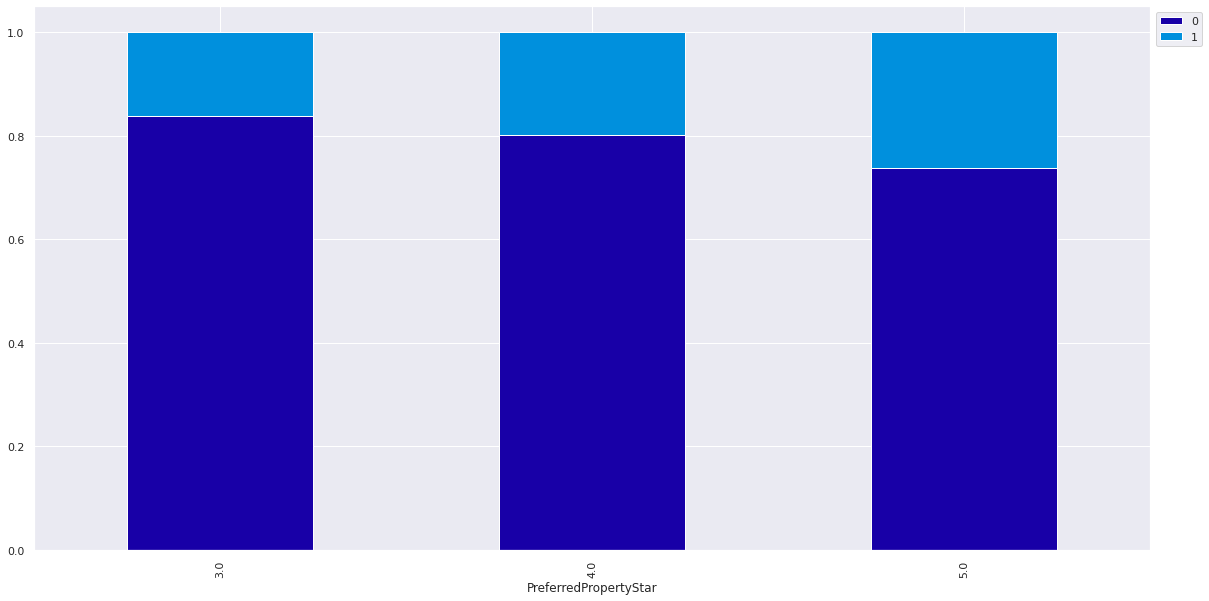

In [58]:
stacked_plot(df['PreferredPropertyStar'])

Customers who prefer 5 star properties are more likely to purchase packages

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


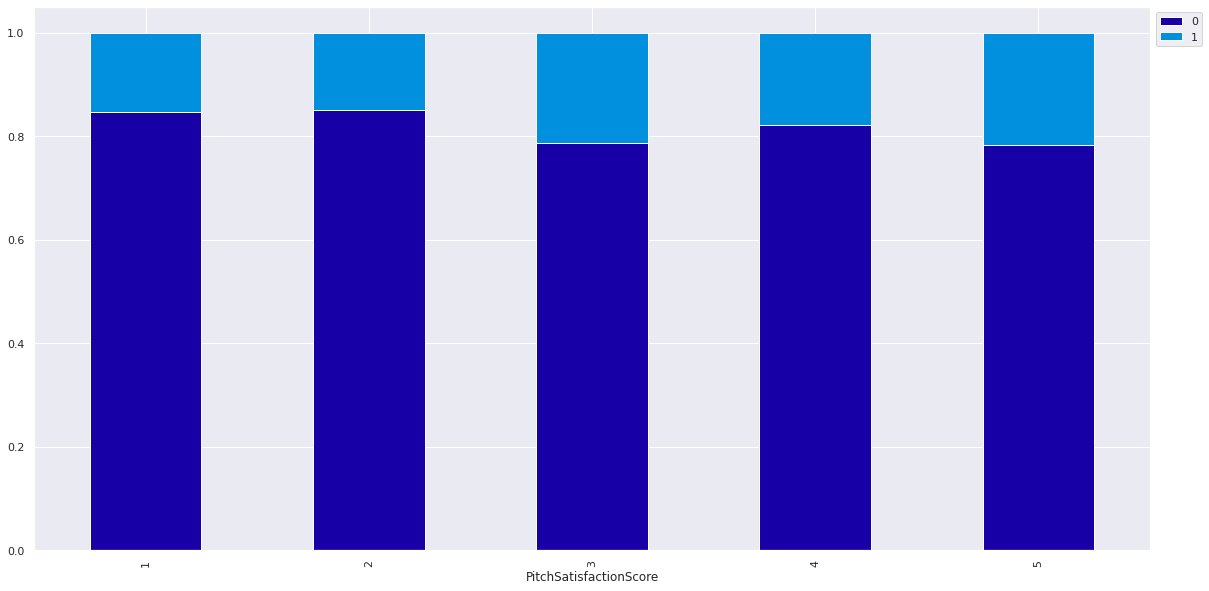

In [59]:
stacked_plot(df['PitchSatisfactionScore'])

As expected, customers who have higher satisfaction scores are more slightly likely to purchase packages

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


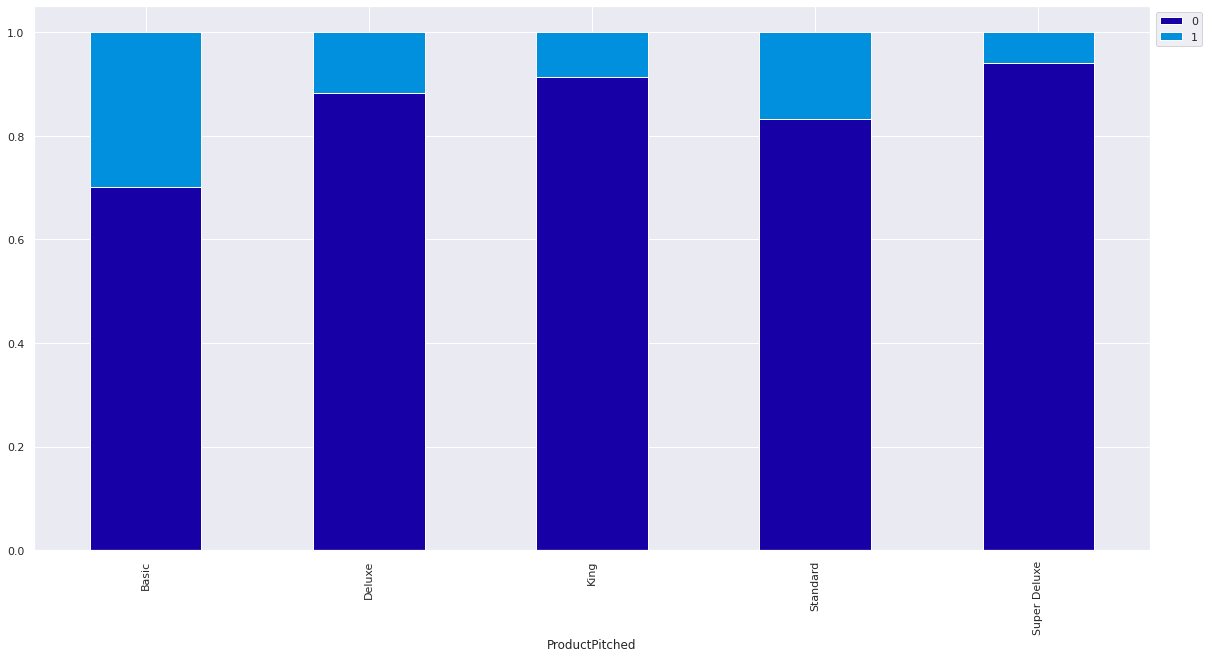

In [60]:
stacked_plot(df['ProductPitched'])

* * ProeuctPitched and ProdTaken - Basic packages and Standard packages are more likely to be purchased than Deluxe, King, or Super Deluxe
* It appears that less expensive packages are the more popular

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


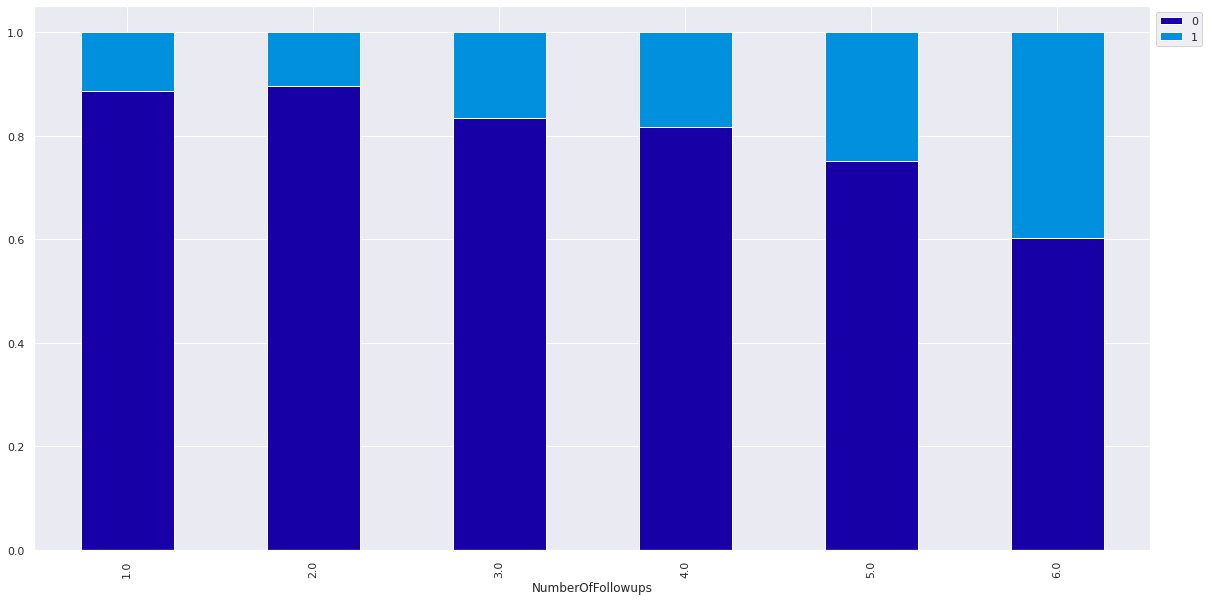

In [61]:
stacked_plot(df['NumberOfFollowups'])

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


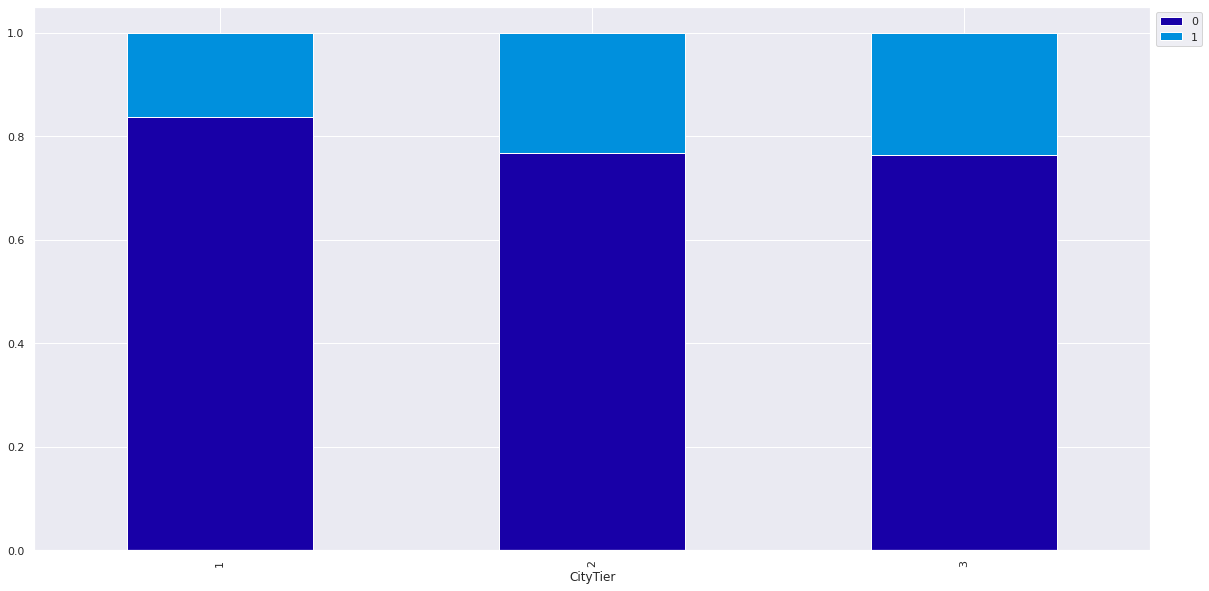

In [62]:
stacked_plot(df['CityTier'])

The more followups performed by employees seems to indicate an increase in the likehood of package purchases

## Summary of EDA

#### Data Description

* Dependent variable is ProdTaken which indicates whether or not a customer has purchased a package
* Original dataset had 20 columns and 4888 rows

#### Data Cleaning
* CustomerID was dropped
* Missing values for MonthlyIncome were filled using the median groupedby Designation for greater relevance
* All other missing numeric values were filled using the column median
* TypeOfContact a categorical variable had 25 missing values which were filled with "Unknown"
* Gender variable value "Fe Male" was changed to "Female" for consistency

#### Outliers Treatment
* 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome' were trimmed at the 1.5 * IQR range and modeled through all stages including XGBoost with Tuning. However, the results were inferior to the non trimmed results and therefore not kept as the final model

#### Observations from EDA
* Age is fairly well distributed with a mean of 37.6 and median of 36
* DurationOfPitch is right skewed with several major outliers
* NumberOfTrips is right skewed with several major outliers
* MonthlyIncome is right skewed with several outliers at the top and bottom
* 81.2% of customers did not purchase a travel package
* 70.5% of customers came to the company via Self Enquiry not Company Invited
* The majority of customers identify as Salaried Employees or Small Business
* 50.7% of customers are Male
* The most commong packages pitched to customers were either Basic (37.7%) or Deluxe (35,4%)
* 47.9% of customers are Married 
* Customers tend to be either Executives (37.7%) or Managers (35.4%)

#### Bivariate and Multivariate Observations
* There does not seem to much strong correlation in the dataset which is surprising
* Age has a loose correlation with MonthlyIncome
* NumberOfPersonVisiting has a positve association with * NumberofChildrenVisiting which makes sense. We may look to drop one of these column
* VP and AVP make the highest median incomes however, Executives have several outliers with outsized incomes  
* Incomes across occupation type are fairly evenly distributed
* Property, Passport, Pitch Satisfaction Score were not impacted by MonthlyIncome levels
* NumberOfTrips and NumberOfChildren Visiting had a slightly positive relationship with Income which is expected
* Gender did not impact median income but females had a mcuh wider variance  
* Age impacted income up til 40 years of age but had less impact for years after 40

#### ProdTaken Purchase Analysis
* Age and ProdTaken - younger customers are more likely to purchase
* Gender and ProdTaken - Men are slightly more likely than women to purchase
* Designation and ProdTaken - Executives are the most likely followed by Senior Mangers. Associate Vice PResidents were the least likely tp purchase 
* Occupation and ProdTaken -  FreeLancers had a small sample size but showed a strong inclination towards purchaing followed by Large Businesses, Small Businesses, and Salaried employees respectively
* OwnCar and ProdTaken - car ownership or non-ownership were both equally as likely to purchase 
* PreferredPropertyStar and ProdTaken - Customers who prefer hire rated properties tend to make more purchases
* PitchSatisfactionScore and ProdTaken - Higher satisfaction relates to more purchases as one would expect
* ProeuctPitched and ProdTaken - Basic packages and Standard packages are more likely to be purchased than Deluxe, King, or Super Deluxe
* NumberOfFollowups and ProdTaken - More followups equate to more purchasese (duh)


## Trim Outliers

In [63]:
income_quartiles = np.quantile(df['MonthlyIncome'][df['MonthlyIncome'].notnull()], [.25, .75])
income_iqr = 1.5 * (income_quartiles[1] - income_quartiles[0])
print(f'Q1 = {income_quartiles[0]}, Q3 = {income_quartiles[1]}, 1.5*IQR = {income_iqr}')
outlier_income = df.loc[np.abs(df['MonthlyIncome'] - df['MonthlyIncome'].median()) > income_iqr, 'MonthlyIncome']
outlier_income

Q1 = 20485.0, Q3 = 25424.75, 1.5*IQR = 7409.625


18      30427.0
25      34094.0
29      33947.0
38      95000.0
45      34545.0
         ...   
4868    36539.0
4869    37865.0
4870    38395.0
4876    32704.0
4885    31820.0
Name: MonthlyIncome, Length: 598, dtype: float64

In [64]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: df frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) 
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical variables
    col_list: list of numerical varaibles
    df: df frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [65]:
trim_col = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome'] # getting list of columns

# treating outliers
trim_col = [ele for ele in trim_col] 
data = treat_outliers_all(df,trim_col)

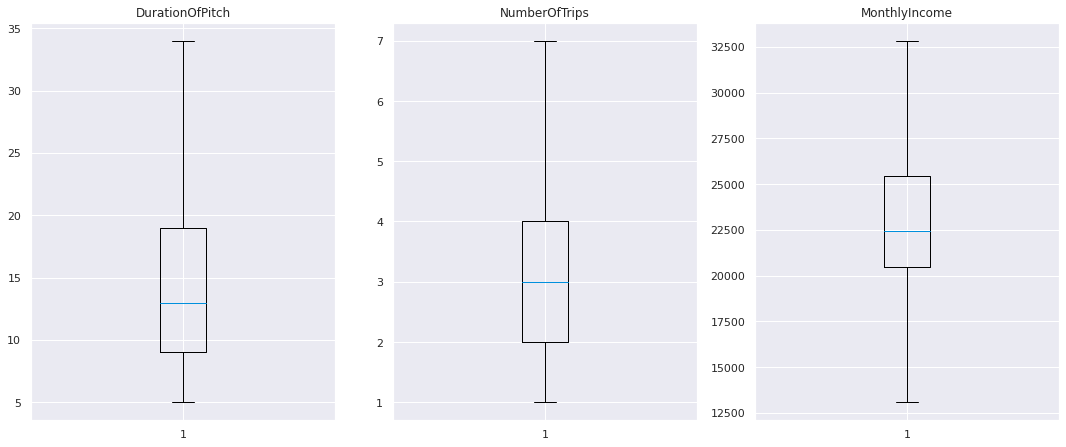

In [66]:

plt.figure(figsize=(20,30))

for i, variable in enumerate(trim_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

In [67]:
X = df.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['ProdTaken']

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* This is done using the `stratify` parameter in the train_test_split function.

In [68]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 30) (1467, 30)


In [69]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [70]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an customer will purchase ProdTaken and the customer doesn't purchase (increase marketing costs; False Positive)
2. Predicting an customer will not purchase ProdTaken and the customer would have made a purchase (lose customers; False Neagtive)

### Which case is more important? 
* Predicting that customer will not purchase ProdTaken and the customer would have made a purchase (lose customers)

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can expand its customer base and increase profits

#### We will now define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models

In [71]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [72]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [73]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [74]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [75]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [76]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.19, 1: 0.81},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

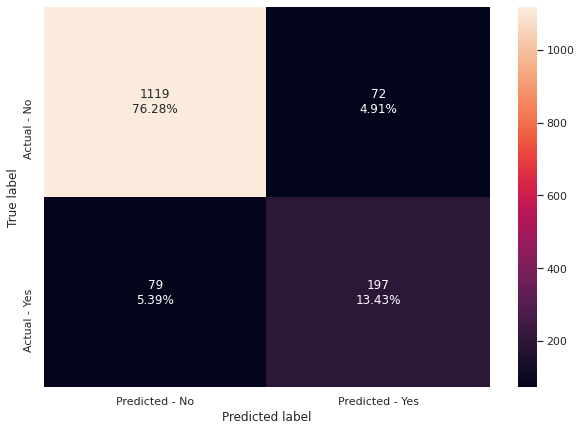

In [77]:
make_confusion_matrix(dtree,y_test)

In [78]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8970688479890934
Recall on training set :  1.0
Recall on test set :  0.7137681159420289
Precision on training set :  1.0
Precision on test set :  0.7323420074349443


- There is classic overfitting in this model
- Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

In [79]:
# Feature importance of Decision Tree

print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DurationOfPitch              0.141695
Age                          0.118342
MonthlyIncome                0.116212
Passport                     0.084964
Designation_Executive        0.054979
NumberOfTrips                0.053398
PitchSatisfactionScore       0.050957
NumberOfFollowups            0.047190
CityTier_3                   0.038103
MaritalStatus_Single         0.029436
PreferredPropertyStar        0.028940
Gender_Male                  0.028646
MaritalStatus_Unmarried      0.023254
CityTier_2                   0.022424
MaritalStatus_Married        0.021324
NumberOfPersonVisiting       0.020575
NumberOfChildrenVisiting     0.018143
Occupation_Salaried          0.017794
Occupation_Small Business    0.015362
TypeofContact_Self Enquiry   0.014770
Occupation_Large Business    0.014195
Designation_Senior Manager   0.010682
ProductPitched_Deluxe        0.008135
OwnCar                       0.007958
ProductPitched_King          0.007323
ProductPitch

In [80]:
feature_names = X_train.columns

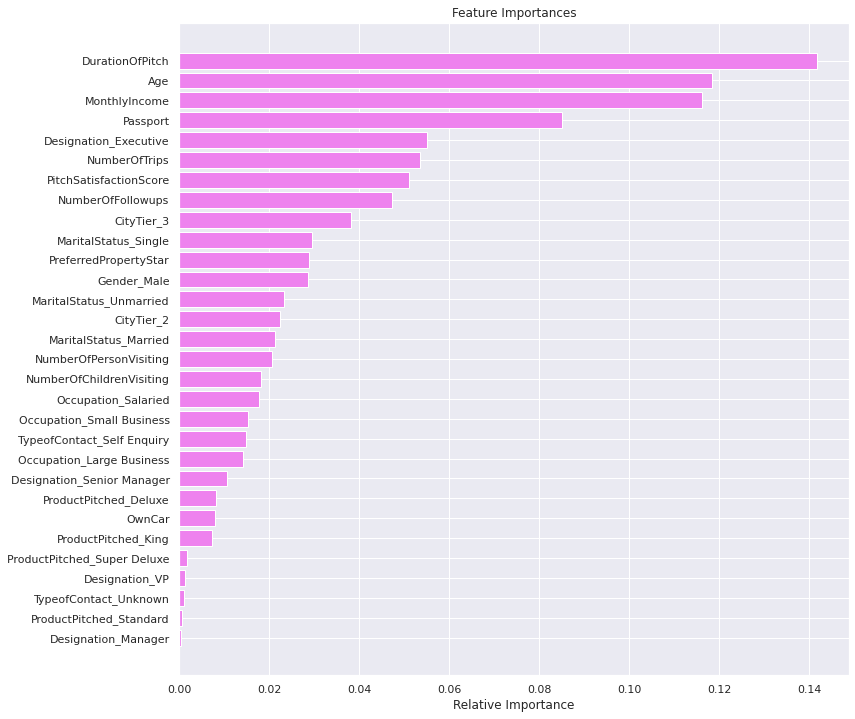

In [81]:
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Bagging Classifier


In [82]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

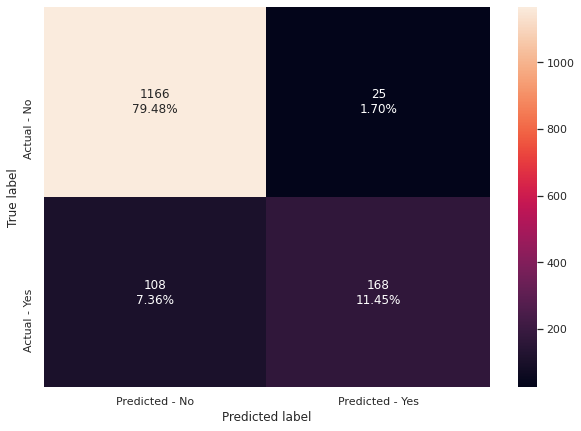

In [83]:
make_confusion_matrix(bagging,y_test)

In [84]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.9093387866394002
Recall on training set :  0.9720496894409938
Recall on test set :  0.6086956521739131
Precision on training set :  0.9968152866242038
Precision on test set :  0.8704663212435233


 - Compared to the Decision Tree bagging improved the results
 - However, in terms of Recall, bagging is overfitting the training data and performing poorly on the test set 

**Bagging Classifier with weighted decision tree**

In [85]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

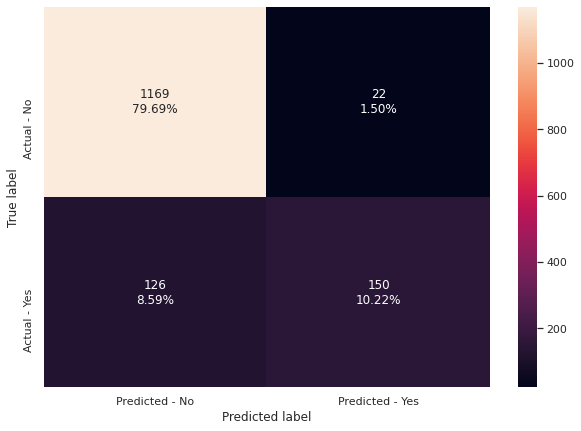

In [86]:
make_confusion_matrix(bagging_wt,y_test)

In [87]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)

Accuracy on training set :  0.9947383805904706
Accuracy on test set :  0.8991138377641446
Recall on training set :  0.9767080745341615
Recall on test set :  0.5434782608695652
Precision on training set :  0.995253164556962
Precision on test set :  0.872093023255814


 - Performance of the weighted bagging classifier model did not improve relative to the previous model

### Random Forest

In [88]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

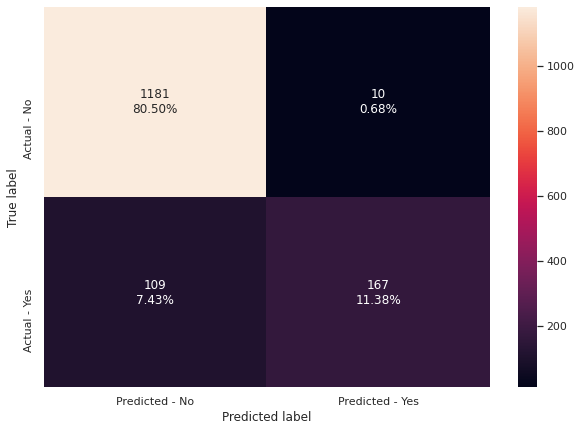

In [89]:
make_confusion_matrix(rf,y_test)

In [90]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9188820722563054
Recall on training set :  1.0
Recall on test set :  0.605072463768116
Precision on training set :  1.0
Precision on test set :  0.943502824858757


- Random Forest model did well in terms of Accuracy and Precision but poorly on Recall
- Model is overfitting the training set and not generalizing well in the test data

In [91]:
# Feature importance of Random Forest

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.125563
Age                          0.122490
DurationOfPitch              0.101049
Passport                     0.070425
NumberOfTrips                0.065278
PitchSatisfactionScore       0.058490
NumberOfFollowups            0.055164
PreferredPropertyStar        0.044666
NumberOfChildrenVisiting     0.032481
CityTier_3                   0.031233
NumberOfPersonVisiting       0.028524
MaritalStatus_Single         0.028251
Designation_Executive        0.027943
TypeofContact_Self Enquiry   0.025236
Gender_Male                  0.024745
OwnCar                       0.021770
Occupation_Salaried          0.018190
Occupation_Small Business    0.017481
MaritalStatus_Unmarried      0.016991
MaritalStatus_Married        0.015733
Occupation_Large Business    0.014708
Designation_Manager          0.010046
CityTier_2                   0.009653
ProductPitched_Deluxe        0.008757
ProductPitched_Standard      0.007199
Designation_

In [92]:
feature_names = X_train.columns

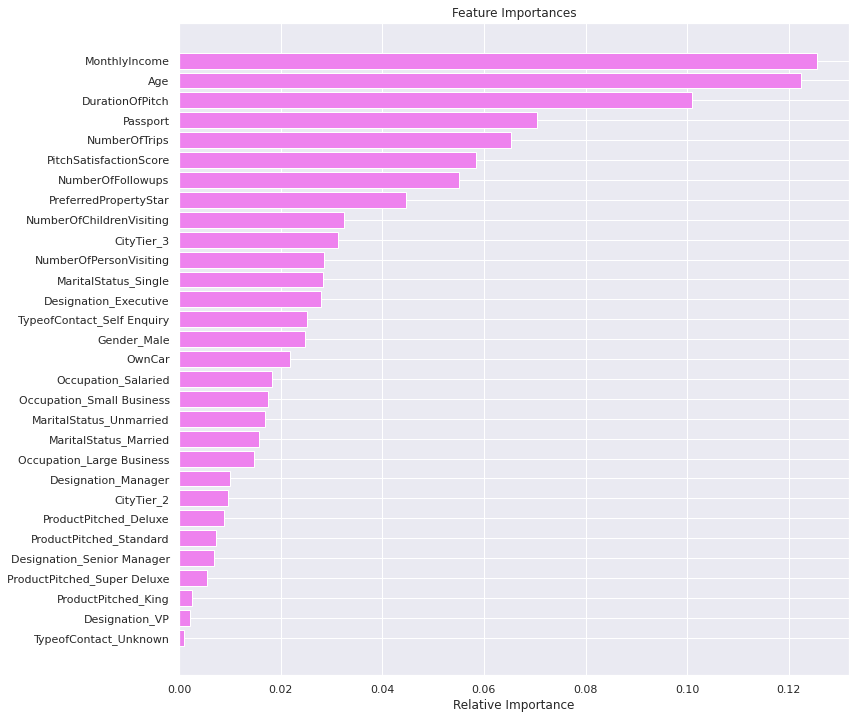

In [93]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Random forest with class weights**

In [94]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.19, 1: 0.81}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

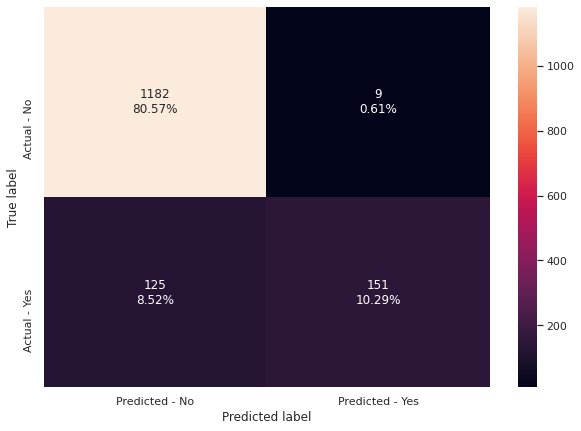

In [95]:
make_confusion_matrix(rf_wt,y_test)

In [96]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9086571233810498
Recall on training set :  1.0
Recall on test set :  0.5471014492753623
Precision on training set :  1.0
Precision on test set :  0.94375


- The weighted Random Forest model did not improve the results

In [97]:
# Feature importance of Random Forest Weighted

print (pd.DataFrame(rf_wt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.116843
Age                          0.114130
DurationOfPitch              0.099511
Passport                     0.073552
NumberOfTrips                0.061962
PitchSatisfactionScore       0.058424
NumberOfFollowups            0.051914
PreferredPropertyStar        0.044407
CityTier_3                   0.034443
NumberOfChildrenVisiting     0.031047
Designation_Executive        0.030092
MaritalStatus_Single         0.028130
NumberOfPersonVisiting       0.026763
Gender_Male                  0.025159
TypeofContact_Self Enquiry   0.025012
OwnCar                       0.021489
MaritalStatus_Married        0.020324
Occupation_Salaried          0.019311
Occupation_Small Business    0.018449
MaritalStatus_Unmarried      0.016631
Occupation_Large Business    0.013832
Designation_Manager          0.013083
ProductPitched_Deluxe        0.012420
ProductPitched_Super Deluxe  0.010437
CityTier_2                   0.008955
Designation_

In [98]:
feature_names = X_train.columns

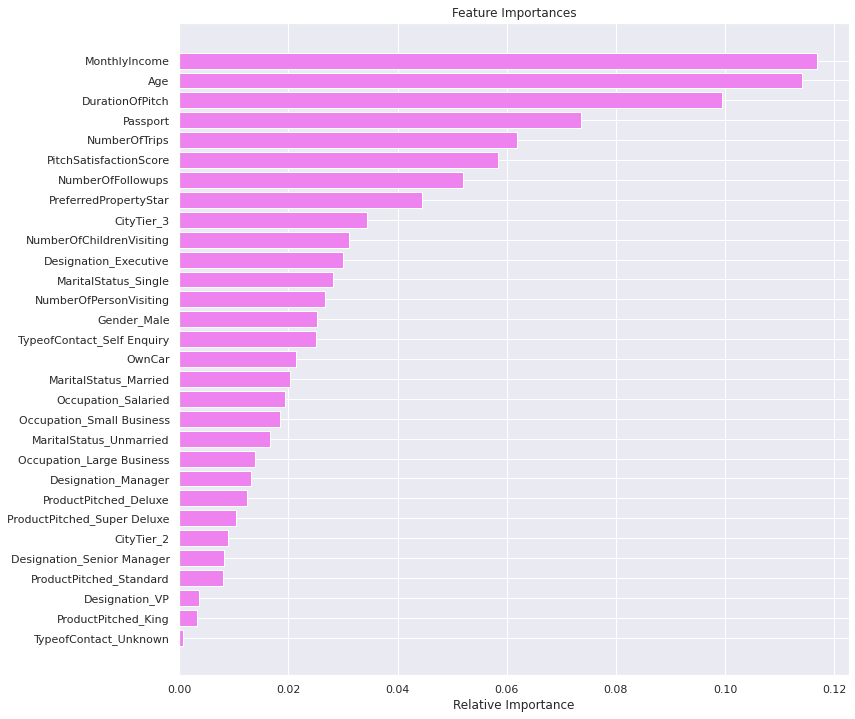

In [99]:
importances = rf_wt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Tuning Models

**Tuning Decision Tree**

In [100]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.19, 1: 0.81},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

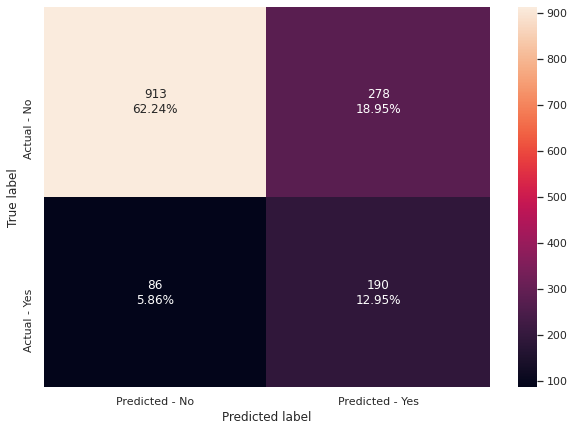

In [101]:
make_confusion_matrix(dtree_estimator,y_test)

In [102]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)

Accuracy on training set :  0.7500730780473546
Accuracy on test set :  0.7518745739604635
Recall on training set :  0.6816770186335404
Recall on test set :  0.6884057971014492
Precision on training set :  0.40312213039485767
Precision on test set :  0.405982905982906


- Strong results. Recall scores are good with less overfitting
- Relative to the orginal decision tree model, performance metrics were slighlty below when applied to the test date however, the model is generalizing on the test data much better and in this way is a better fit

In [103]:
# Feature importance of Tuned Decision Tree

print (pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.322514
Designation_Executive        0.151218
CityTier_3                   0.100471
Age                          0.086554
MaritalStatus_Single         0.079216
DurationOfPitch              0.075022
MaritalStatus_Married        0.037960
NumberOfTrips                0.037850
PreferredPropertyStar        0.034050
Designation_Senior Manager   0.027069
Occupation_Large Business    0.024498
NumberOfFollowups            0.023578
TypeofContact_Self Enquiry   0.000000
ProductPitched_Standard      0.000000
NumberOfPersonVisiting       0.000000
Designation_Manager          0.000000
MaritalStatus_Unmarried      0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
ProductPitched_Super Deluxe  0.000000
ProductPitched_King          0.000000
TypeofContact_Unknown        0.000000
ProductPitched_Deluxe        0.000000
Gender_Male                  0.000000
Occupation_Small Business    0.000000
Occupation_S

In [104]:
feature_names = X_train.columns

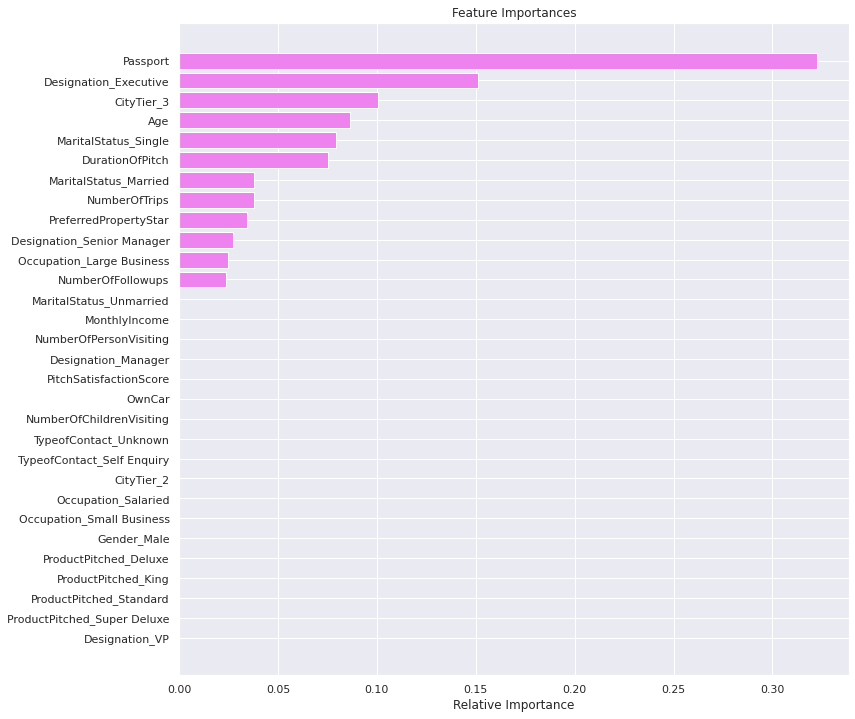

In [105]:
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Tuning Bagging Classifier**

In [106]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=1,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight...
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                  

In [107]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

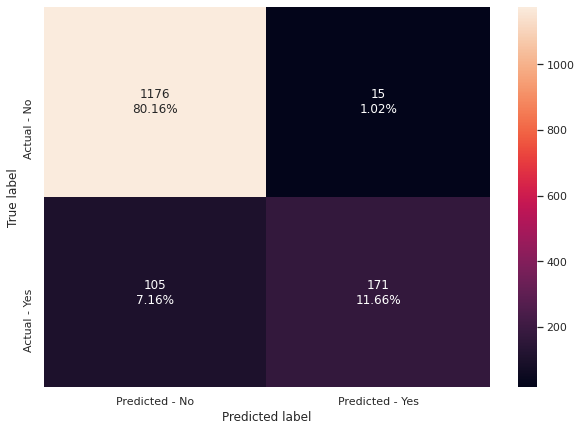

In [108]:
make_confusion_matrix(bagging_estimator,y_test)

In [109]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.918200408997955
Recall on training set :  1.0
Recall on test set :  0.6195652173913043
Precision on training set :  1.0
Precision on test set :  0.9193548387096774


- Recall did not improve the results relative to the tuned Decision Tree model


**Tuning Random Forest**

In [110]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1,6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

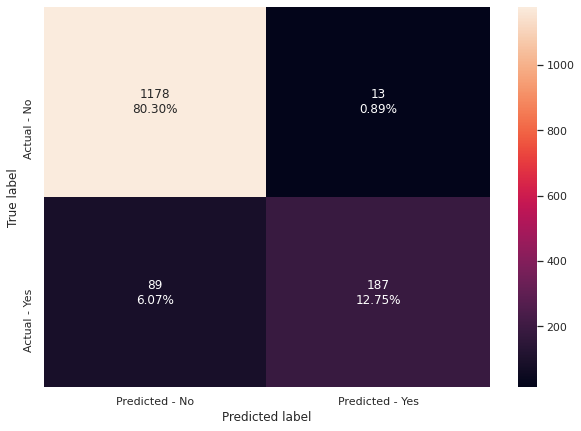

In [111]:
make_confusion_matrix(rf_estimator,y_test)

In [112]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9304703476482618
Recall on training set :  1.0
Recall on test set :  0.677536231884058
Precision on training set :  1.0
Precision on test set :  0.935


- Recall scores are slightly below previous models and there is some overfitting

In [113]:
# Feature importance of Tuned Random Forest

print (pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.134199
Age                          0.133061
DurationOfPitch              0.114270
Passport                     0.066009
NumberOfTrips                0.062238
NumberOfFollowups            0.055116
PitchSatisfactionScore       0.054475
Designation_Executive        0.049496
PreferredPropertyStar        0.036318
CityTier_3                   0.035664
MaritalStatus_Single         0.029379
NumberOfChildrenVisiting     0.024397
NumberOfPersonVisiting       0.023418
Gender_Male                  0.022538
TypeofContact_Self Enquiry   0.020777
MaritalStatus_Unmarried      0.019804
Occupation_Large Business    0.016127
OwnCar                       0.015759
Occupation_Small Business    0.014241
Occupation_Salaried          0.013868
MaritalStatus_Married        0.013542
CityTier_2                   0.009951
ProductPitched_Deluxe        0.007384
Designation_Manager          0.007345
ProductPitched_Standard      0.006059
Designation_

In [114]:
feature_names = X_train.columns

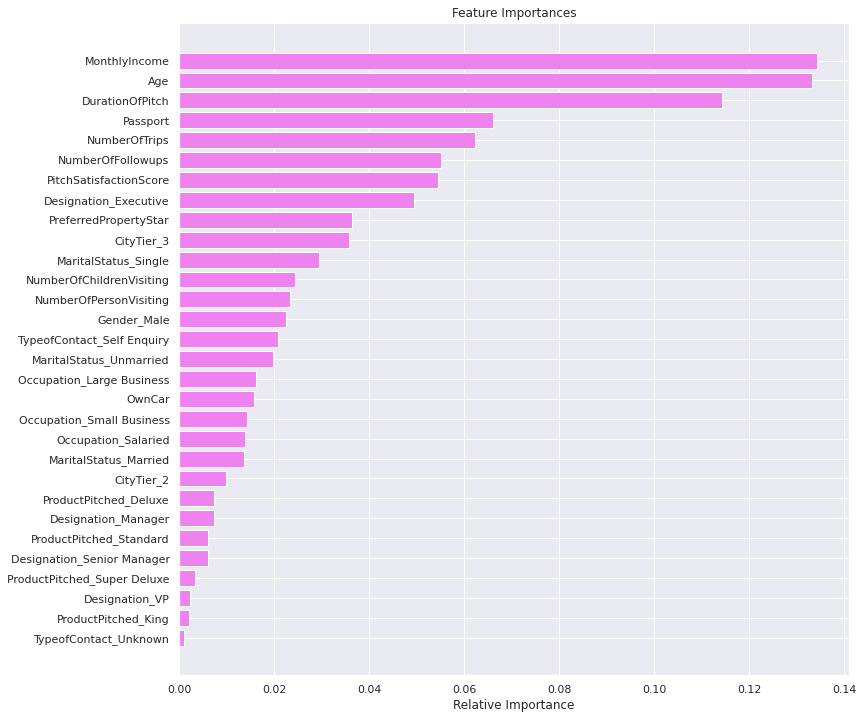

In [115]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   MonthlyIncome is the most important feature followed closely by Age and DurationOfPitch





### Comparing all the models

In [116]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [117]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.897069,1.000000,0.713768,1.000000,0.732342
1,Tuned Decision Tree,0.750073,0.751875,0.681677,0.688406,0.403122,0.405983
2,Bagging Classifier,0.994154,0.909339,0.972050,0.608696,0.996815,0.870466
3,Weighted Bagging Classifier,0.994738,0.899114,0.976708,0.543478,0.995253,0.872093
4,Tuned Bagging Classifier,1.000000,0.918200,1.000000,0.619565,1.000000,0.919355
5,Random Forest,1.000000,0.918882,1.000000,0.605072,1.000000,0.943503
6,Weighted Random Forest,1.000000,0.908657,1.000000,0.547101,1.000000,0.943750
7,Tuned Random Forest,1.000000,0.930470,1.000000,0.677536,1.000000,0.935000


### Results of Bagging
* Decision Tree produced the best recall scores (0.714) but  is overfitting the training data
* Tuned Decision Tree model had slighlty lower recall scores (traing 0.682, test 0.688) but seems to be a better generalized model


# Boosting Algorithms

### ADABoost Classifier

In [118]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [119]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [120]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8450745396083017
Accuracy on test set :  0.847307430129516
Recall on training set :  0.31521739130434784
Recall on test set :  0.3115942028985507
Precision on training set :  0.6952054794520548
Precision on test set :  0.7166666666666667


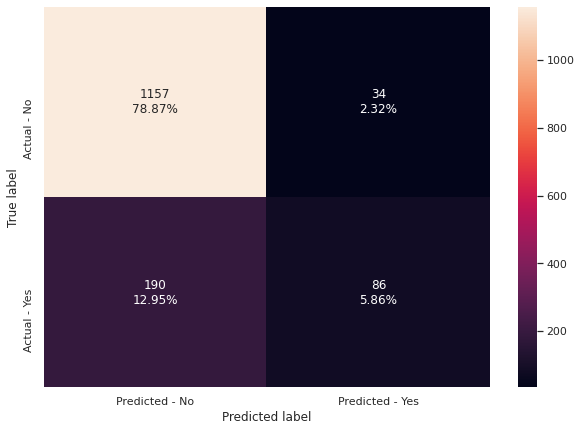

In [121]:
make_confusion_matrix(abc,y_test)

In [122]:
# Feature importance of AdaBoost Classifier

print (pd.DataFrame(abc.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
MonthlyIncome                0.24
Age                          0.20
DurationOfPitch              0.08
NumberOfFollowups            0.08
NumberOfTrips                0.06
NumberOfPersonVisiting       0.04
PreferredPropertyStar        0.04
PitchSatisfactionScore       0.04
Designation_Executive        0.02
MaritalStatus_Unmarried      0.02
MaritalStatus_Single         0.02
ProductPitched_Super Deluxe  0.02
ProductPitched_Standard      0.02
Gender_Male                  0.02
Occupation_Large Business    0.02
CityTier_3                   0.02
CityTier_2                   0.02
TypeofContact_Self Enquiry   0.02
Passport                     0.02
Occupation_Salaried          0.00
Occupation_Small Business    0.00
ProductPitched_Deluxe        0.00
ProductPitched_King          0.00
TypeofContact_Unknown        0.00
MaritalStatus_Married        0.00
NumberOfChildrenVisiting     0.00
OwnCar                       0.00
Designation_Manager          0.00
Designation_Se

In [123]:
feature_names = X_train.columns

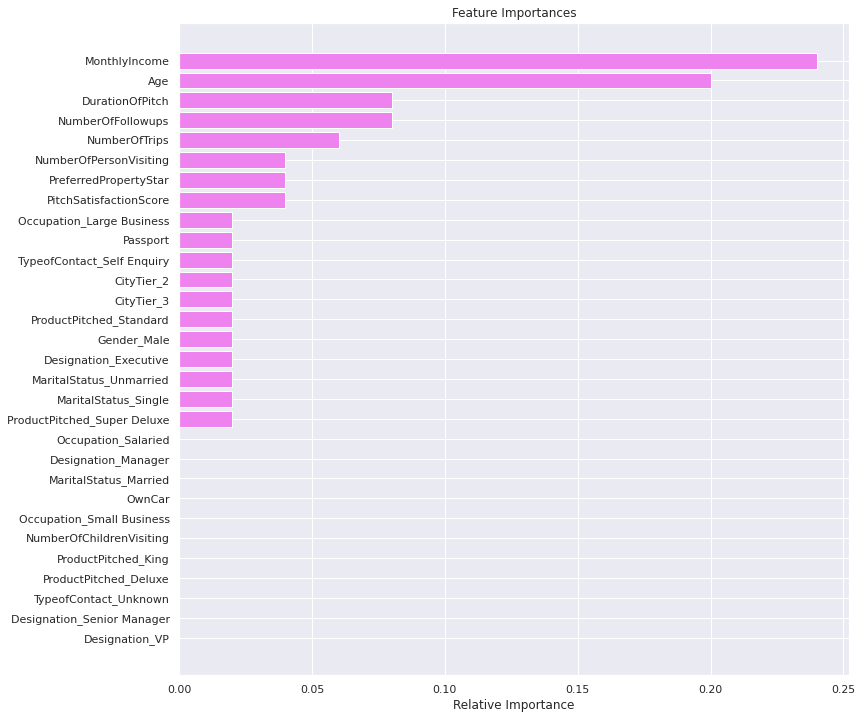

In [124]:
importances = abc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier

In [125]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [126]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8892136802104648
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.468944099378882
Recall on test set :  0.39492753623188404
Precision on training set :  0.8908554572271387
Precision on test set :  0.7841726618705036


Recall score of 0.39 is not good

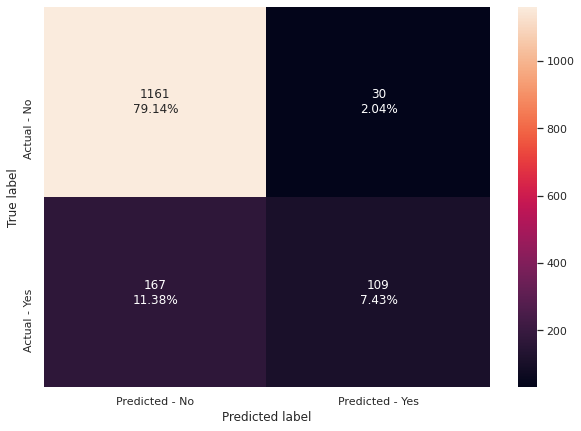

In [127]:
make_confusion_matrix(gbc,y_test)

In [128]:
# Feature importance of GradientBoost Classifier

print (pd.DataFrame(gbc.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.161341
MonthlyIncome                0.129733
Age                          0.122144
Designation_Executive        0.111412
DurationOfPitch              0.070128
NumberOfFollowups            0.062981
CityTier_3                   0.059321
MaritalStatus_Single         0.056565
NumberOfTrips                0.047003
PreferredPropertyStar        0.037497
MaritalStatus_Unmarried      0.035344
PitchSatisfactionScore       0.021847
Occupation_Large Business    0.012699
CityTier_2                   0.011439
TypeofContact_Self Enquiry   0.007588
ProductPitched_Deluxe        0.006891
Designation_Manager          0.006438
NumberOfPersonVisiting       0.006415
ProductPitched_Standard      0.006232
Designation_Senior Manager   0.006022
ProductPitched_Super Deluxe  0.005370
Gender_Male                  0.004370
MaritalStatus_Married        0.003189
Occupation_Small Business    0.002620
Occupation_Salaried          0.002545
ProductPitch

In [129]:
feature_names = X_train.columns

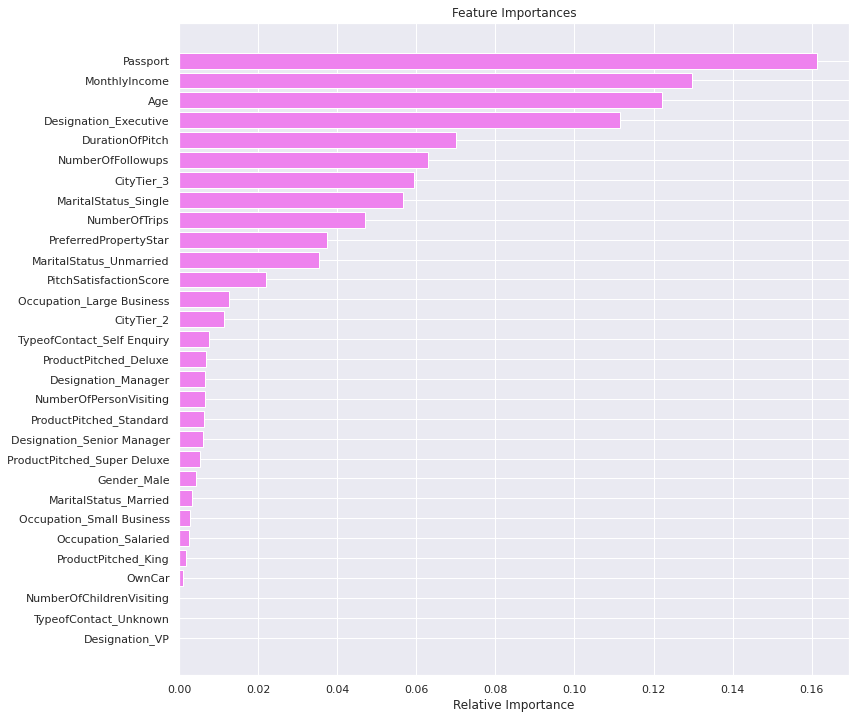

In [130]:
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport jumps up to be strongest feature

### XGBoost Classifier

In [131]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [132]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.8792750657702426
Accuracy on test set :  0.8616223585548739
Recall on training set :  0.41770186335403725
Recall on test set :  0.36594202898550726
Precision on training set :  0.8762214983713354
Precision on test set :  0.7829457364341085


- recal scores are not good

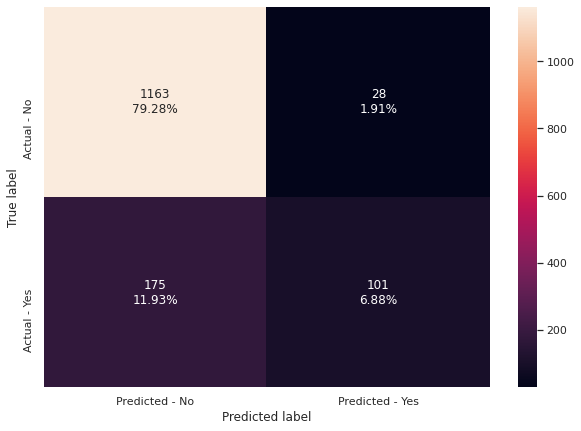

In [133]:
make_confusion_matrix(xgb,y_test)

In [134]:
# Feature importance of XGBoost Classifier

print (pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Designation_Executive        0.165046
Passport                     0.107618
MaritalStatus_Single         0.067229
OwnCar                       0.052192
CityTier_3                   0.046214
MaritalStatus_Unmarried      0.045956
MonthlyIncome                0.039282
PreferredPropertyStar        0.037602
DurationOfPitch              0.037044
NumberOfTrips                0.036835
Occupation_Large Business    0.035326
ProductPitched_Deluxe        0.034474
CityTier_2                   0.034108
Age                          0.033988
NumberOfFollowups            0.029742
Occupation_Small Business    0.029522
ProductPitched_Standard      0.027536
TypeofContact_Self Enquiry   0.026343
ProductPitched_Super Deluxe  0.024692
PitchSatisfactionScore       0.023671
Occupation_Salaried          0.023163
Gender_Male                  0.016926
NumberOfPersonVisiting       0.013339
MaritalStatus_Married        0.012152
TypeofContact_Unknown        0.000000
NumberOfChil

In [135]:
feature_names = X_train.columns

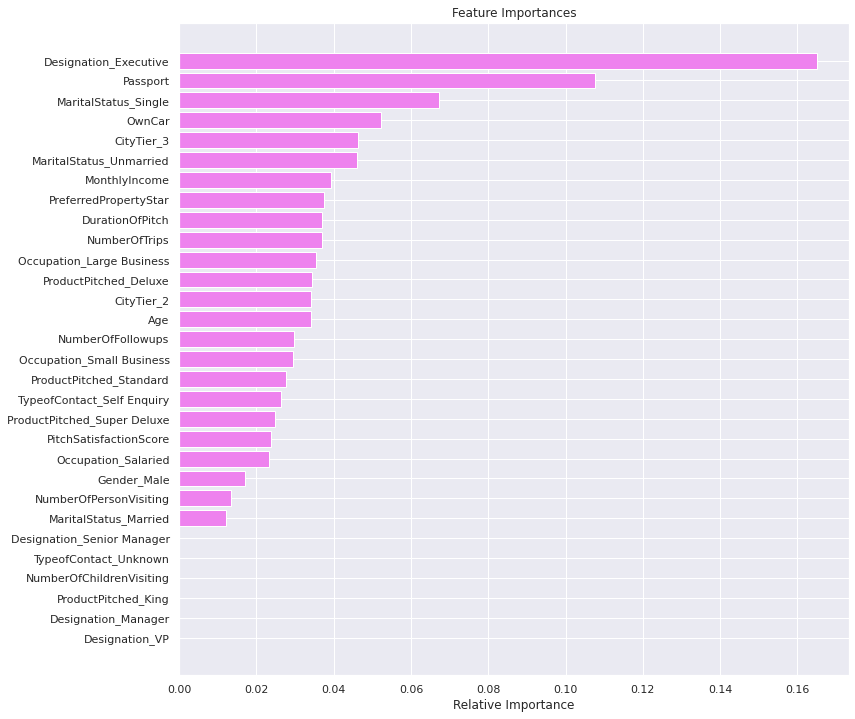

In [136]:
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Hyperparameter Tuning

### AdaBoost Classifier - Tuned


In [137]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [138]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9929845074539608
Accuracy on test set :  0.8813905930470347
Recall on training set :  0.9720496894409938
Recall on test set :  0.6413043478260869
Precision on training set :  0.990506329113924
Precision on test set :  0.7023809523809523


- strong overall model

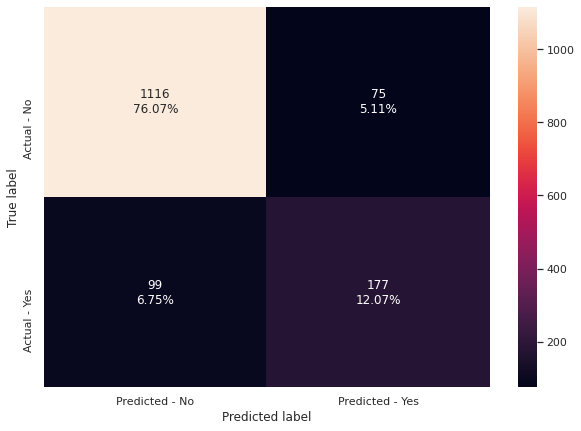

In [139]:
make_confusion_matrix(abc_tuned,y_test)

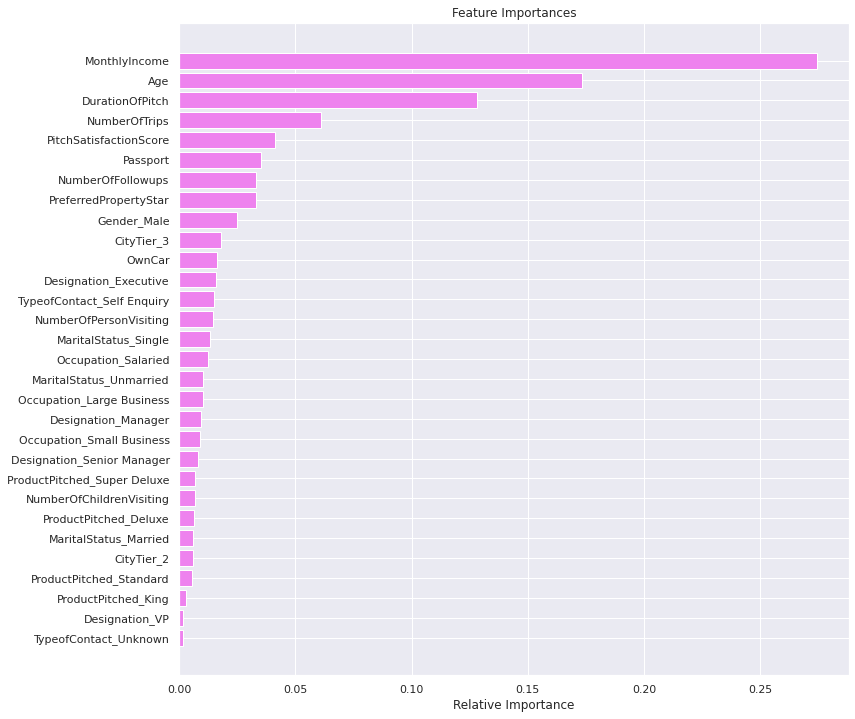

In [140]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier - Tuned

In [141]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
            

In [142]:
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8909675533469745
Accuracy on test set :  0.8684389911383776
Recall on training set :  0.4767080745341615
Recall on test set :  0.39492753623188404
Precision on training set :  0.8950437317784257
Precision on test set :  0.8074074074074075


- model did not improve

In [143]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
             

In [144]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9231218941829874
Accuracy on test set :  0.8847989093387867
Recall on training set :  0.6319875776397516
Recall on test set :  0.5036231884057971
Precision on training set :  0.9399538106235565
Precision on test set :  0.8128654970760234


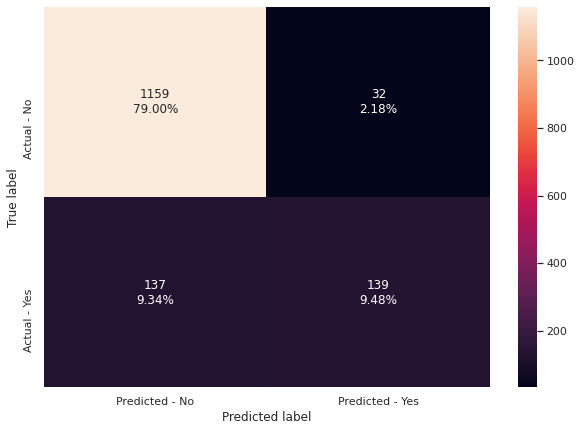

In [145]:
make_confusion_matrix(gbc_tuned,y_test)

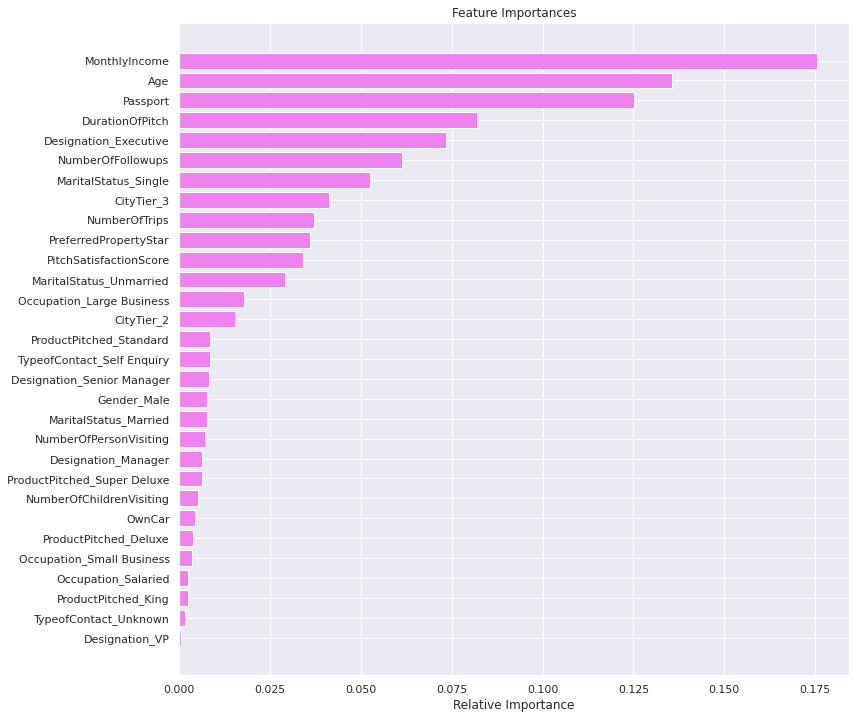

In [146]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier Tuned


In [147]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [148]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.667348728441976
Accuracy on test set :  0.6816632583503749
Recall on training set :  0.7686335403726708
Recall on test set :  0.7934782608695652
Precision on training set :  0.3335579514824798
Precision on test set :  0.3481717011128776


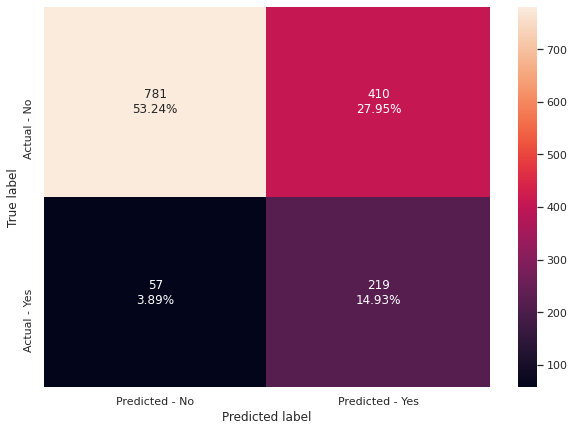

In [149]:
make_confusion_matrix(xgb_tuned,y_test)

- XGBoost Tuned produced the highest recall which resulted in lowest False Negatives (50 for 3.41%) and most True Postives (226 for 15.41%)
- This model would be best at increasing the customer base but due to high False Positives could see an increase in marketing costs
- strongest overall model

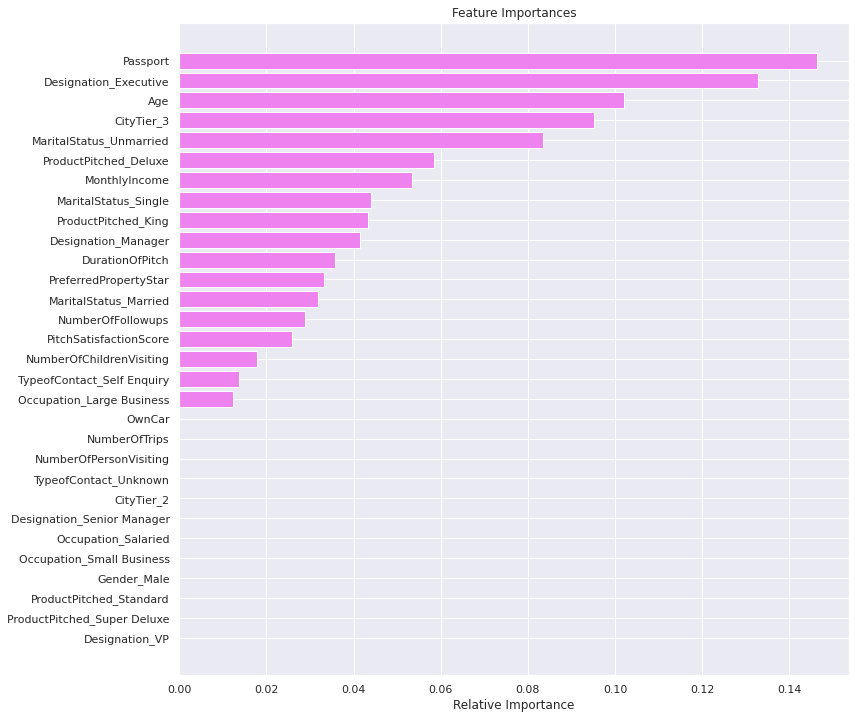

In [150]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Stacking Model

#### We will now build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction

In [151]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [152]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       criterion='gini',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=15,
                                                       min_impurity_decrease=0.0001,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
         

In [153]:
#Using above defined function to get accuracy, recall and precision on train and test set
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9338786639400136
Recall on training set :  1.0
Recall on test set :  0.7898550724637681
Precision on training set :  1.0
Precision on test set :  0.8482490272373541


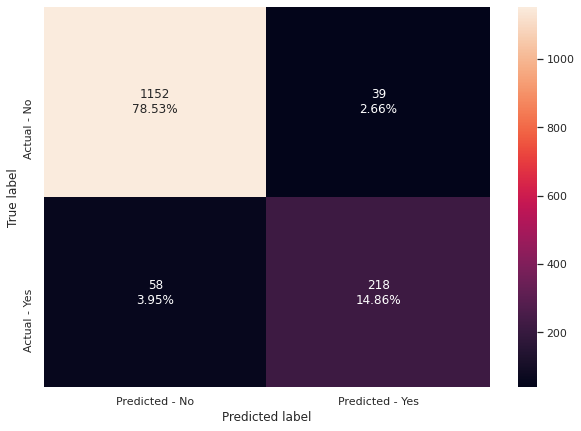

In [154]:
make_confusion_matrix(stacking_estimator,y_test)

- strong recall scores but seems there is overfitting

## Comparing the Performance of all Tuned Boosting and Stacking Models


In [157]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],3))
    acc_test.append(np.round(j[1],3))
    recall_train.append(np.round(j[2],3))
    recall_test.append(np.round(j[3],3))
    precision_train.append(np.round(j[4],3))
    precision_test.append(np.round(j[5],3))

In [158]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default parameters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned', 'Stacking Estimator'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default parameters,0.845,0.847,0.315,0.312,0.695,0.717
1,AdaBoost Tuned,0.993,0.881,0.972,0.641,0.991,0.702
2,Gradient Boosting with default parameters,0.889,0.866,0.469,0.395,0.891,0.784
3,Gradient Boosting with AdaBoost,0.891,0.868,0.477,0.395,0.895,0.807
4,Gradient Boosting Tuned,0.923,0.885,0.632,0.504,0.940,0.813
5,XGBoost with default parameters,0.879,0.862,0.418,0.366,0.876,0.783
6,XGBoost Tuned,0.667,0.682,0.769,0.793,0.334,0.348
7,Stacking Estimator,1.000,0.934,1.000,0.790,1.000,0.848


### Tuned Boosting Results

* XGBoost Tuned produced the highest Recall scores (0.793)
* Stacking Estimatorhad the highest Accuracy (0.934) and Precision (0.848)


## Conclusion

- XGBoost Tuned produced the highest recall and appears to be the strongest overall generalized model



# Business Recommendations

* The business should focus their primary marketing efforts towards young executives working at large companies, who are unmarried, who make high monthly salaries, lice in tier1 cities and hold passports
* Deluxe and Standard packages are more likely to be pruchased than more expensive pacakges
* It's also best to invest in sales training and instruct your employees to followup with customers six times as it is more likley to lead to sales
* Both Males are slightly more likely to purchase than females and should be targeted accordingly
* Young married couples with high incomes are as strong secondary market and efforts should be made to reach out to this demographic and tailor packages to their needs
